# AT&T_face_data

# import package

In [12]:
# import package
# warning
import warnings
warnings.filterwarnings("ignore")
# data
import numpy as np
import pandas as pd
# visulaize
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# adjust data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
# PCA
from sklearn.decomposition import PCA
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay

# import function

In [2]:
# import ML_func.py
from ML_func import ml_func
func = ml_func()

# import data

In [3]:
att_data = pd.read_csv("face_data.csv")
att_data.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


# process data

In [5]:
# take out X, y
X = att_data.drop(columns=['target'])
y = att_data['target']

## original data

In [6]:
X_train_original, X_test_original, y_train, y_test = func.preprocess_data(
    X, y, 65536)

training data : 320
testing data : 80


## standardize data

In [7]:
X_train_scaled, X_test_scaled, y_train, y_test = func.preprocess_data(
    X, y, 65536, standard="True")

standardlize training data : 320
standardlize testing data : 80


## pca data

standardlize training data : 320
standardlize testing data : 80
finish doing pca


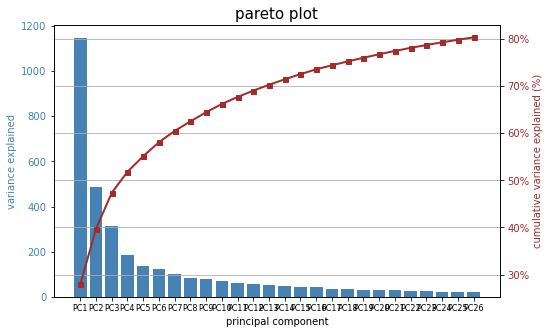

In [8]:
X_train_pca, X_test_pca, y_train, y_test = func.preprocess_data(
    X, y, 65536, standard="True", pca="True", n_pc=0.8, show_plot="True")

上述得到的檔案共有 3 個，分別是以下 :  <br>
* 原始的資料 (original) <br>
* 標準化後的資料 (scaled) <br>
* 先標準化過後，再進行 PCA 的資料，取累積解釋力到 0.8 的 (pca) <br>

之後藉由這些資料各自拆分成不同的 train & test <br>
共得到 3 種類型的資料 <br>

# modeling standardize data
把標準化後的資料建模 <br>

## MLR
多元羅吉斯回歸 (Multinomial Logistic Regression) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [9]:
# MLR model & hyperparametersmodel
mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(1e6), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)
mlr_model.fit(X_train_scaled, y_train)
# predict
y_pred_mlr = mlr_model.predict(X_test_scaled)

In [75]:
# evaluation
mlr_eva = func.evaluate_model(y_test, y_pred_mlr)
# change to df
mlr_df = pd.DataFrame(list(mlr_eva.items()), columns=[
                      ["standard", "standard"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df

standard      
         MLR      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### grid search

In [15]:
# search best parameter
param_grid = {
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# model
mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(1e6), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)

# grid search
grid_search = GridSearchCV(mlr_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_mlr_best = best_model.predict(X_test_scaled)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [76]:
# evaluation
mlr_eva_best = func.evaluate_model(y_test, y_pred_mlr_best)
# change to df
mlr_df_best = pd.DataFrame(list(mlr_eva_best.items()), columns=[
                      ["standard", "standard"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df_best

standard      
         MLR      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### MLR conclusion
可以發現 2個的結果相同 <br>
為了避免麻煩 <br>
因此使用 default 為最佳模型 <br>

## SVM
支援向量機 (Support Vector Machine) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [17]:
# SVM model & hyperparameter
svm_opts = dict(C=1, tol=1e-6, max_iter=int(1e6))
svm_model = SVC(kernel='linear', **svm_opts)
svm_model.fit(X_train_scaled, y_train)
# predict
y_pred_svm = svm_model.predict(X_test_scaled)

In [78]:
# evaluation
svm_eva = func.evaluate_model(y_test, y_pred_svm)
# change to df
svm_df = pd.DataFrame(list(svm_eva.items()), columns=[
                      ["standard", "standard"], ["SVM", "SVM"], ['metric', 'value']])
svm_df

standard      
         SVM      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### grid search

In [19]:
# search best parameter
param_grid = {
    'C': [0.08, 0.1, 1, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# model
svm_opts = dict(tol=1e-6, max_iter=int(1e6))
svm_model = SVC(**svm_opts)

# grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_svm_best = best_model.predict(X_test_scaled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 0.08, 'gamma': 'scale', 'kernel': 'linear'}


In [20]:
# evaluation
svm_eva_best = func.evaluate_model(y_test, y_pred_svm_best)
# change to df
svm_df_best = pd.DataFrame(list(svm_eva_best.items()), columns=[
                      ["standard", "standard"], ["SVM", "SVM"], ['metric', 'value']])
svm_df_best

standard      
         SVM      
      metric value
0   accuracy  0.96
1  precision  0.98
2     recall  0.96
3   F1-score  0.97

### SVM conclusion
可以發現 2個的結果相同 <br>
為了避免麻煩 <br>
因此使用 default 為最佳模型 <br>

## NN--MLP
神經網路 (Neural Network) -- 多層感知機 (Multilayer perceptron) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [21]:
# NN-MLP model & hyperparameter
hidden_layers = (30,)
opts = dict(hidden_layer_sizes=hidden_layers, verbose=0,
            activation='relu', tol=1e-6, max_iter=int(1e6))
nn_mlp_model = MLPClassifier(solver='adam', **opts)
nn_mlp_model.fit(X_train_scaled, y_train)
# predict
y_pred_nn_mlp = nn_mlp_model.predict(X_test_scaled)

In [32]:
# evaluation
nn_mlp_eva = func.evaluate_model(y_test, y_pred_nn_mlp)
# change to df
nn_mlp_df = pd.DataFrame(list(nn_mlp_eva.items()), columns=[
                         ["standard", "standard"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df

standard      
      NN_MLP      
      metric value
0   accuracy  0.89
1  precision  0.94
2     recall  0.89
3   F1-score  0.89

### grid search

In [24]:
# search best parameter
param_grid = {
    'hidden_layer_sizes': [(30,)],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

# model
opts = dict(verbose=1, tol=1e-6, max_iter=int(1e6))
nn_mlp_model = MLPClassifier(**opts)

# grid search
grid_search = GridSearchCV(nn_mlp_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_nn_mlp_best = best_model.predict(X_test_scaled)
# running time : 37m 43s
# Iteration 23580, loss = 0.02097050
# Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
# Best parameters found:  {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Iteration 1, loss = 3.74697672
Iteration 2, loss = 3.74202818
Iteration 3, loss = 3.73408647
Iteration 4, loss = 3.72429764
Iteration 5, loss = 3.71252714
Iteration 6, loss = 3.69983980
Iteration 7, loss = 3.68623623
Iteration 8, loss = 3.67252057
Iteration 9, loss = 3.65841552
Iteration 10, loss = 3.64447281
Iteration 11, loss = 3.63094157
Iteration 12, loss = 3.61783022
Iteration 13, loss = 3.60511916
Iteration 14, loss = 3.59271689
Iteration 15, loss = 3.58076370
Iteration 16, loss = 3.56936486
Iteration 17, loss = 3.55823431
Iteration 18, loss = 3.54765610
Iteration 19, loss = 3.53738687
Iteration 20, loss = 3.52743680
Iteration 21, loss = 3.51790555
Iteration 22, loss = 3.50870775
Iteration 23, loss = 3.49973912
Iteration 24, loss = 3.49100037
Iteration 25, loss = 3.48268464
Iteration 26, loss = 3.47450938
Iteration 27, loss = 3.46666637
Iteration 28, loss = 3.45892082
Iteration 29, loss = 3.45144703
Iteration 30, loss = 

Iteration 252, loss = 2.71989465
Iteration 253, loss = 2.71760500
Iteration 254, loss = 2.71532434
Iteration 255, loss = 2.71300876
Iteration 256, loss = 2.71073341
Iteration 257, loss = 2.70844251
Iteration 258, loss = 2.70615017
Iteration 259, loss = 2.70386832
Iteration 260, loss = 2.70157651
Iteration 261, loss = 2.69931231
Iteration 262, loss = 2.69701053
Iteration 263, loss = 2.69475545
Iteration 264, loss = 2.69247821
Iteration 265, loss = 2.69017773
Iteration 266, loss = 2.68793112
Iteration 267, loss = 2.68567450
Iteration 268, loss = 2.68339823
Iteration 269, loss = 2.68113014
Iteration 270, loss = 2.67885372
Iteration 271, loss = 2.67661297
Iteration 272, loss = 2.67433781
Iteration 273, loss = 2.67210459
Iteration 274, loss = 2.66982854
Iteration 275, loss = 2.66758241
Iteration 276, loss = 2.66534291
Iteration 277, loss = 2.66308725
Iteration 278, loss = 2.66088784
Iteration 279, loss = 2.65861537
Iteration 280, loss = 2.65637173
Iteration 281, loss = 2.65416677
Iteration 

Iteration 506, loss = 2.18859596
Iteration 507, loss = 2.18666183
Iteration 508, loss = 2.18472958
Iteration 509, loss = 2.18280601
Iteration 510, loss = 2.18084746
Iteration 511, loss = 2.17893984
Iteration 512, loss = 2.17701487
Iteration 513, loss = 2.17508122
Iteration 514, loss = 2.17316037
Iteration 515, loss = 2.17122309
Iteration 516, loss = 2.16930938
Iteration 517, loss = 2.16737781
Iteration 518, loss = 2.16545942
Iteration 519, loss = 2.16353674
Iteration 520, loss = 2.16161925
Iteration 521, loss = 2.15970319
Iteration 522, loss = 2.15777416
Iteration 523, loss = 2.15586712
Iteration 524, loss = 2.15394071
Iteration 525, loss = 2.15203118
Iteration 526, loss = 2.15010419
Iteration 527, loss = 2.14820256
Iteration 528, loss = 2.14629175
Iteration 529, loss = 2.14437534
Iteration 530, loss = 2.14245891
Iteration 531, loss = 2.14056248
Iteration 532, loss = 2.13865560
Iteration 533, loss = 2.13674829
Iteration 534, loss = 2.13484392
Iteration 535, loss = 2.13295110
Iteration 

Iteration 761, loss = 1.73245534
Iteration 762, loss = 1.73082764
Iteration 763, loss = 1.72919806
Iteration 764, loss = 1.72756412
Iteration 765, loss = 1.72592861
Iteration 766, loss = 1.72430445
Iteration 767, loss = 1.72268774
Iteration 768, loss = 1.72105108
Iteration 769, loss = 1.71944733
Iteration 770, loss = 1.71782717
Iteration 771, loss = 1.71620990
Iteration 772, loss = 1.71458429
Iteration 773, loss = 1.71296180
Iteration 774, loss = 1.71134632
Iteration 775, loss = 1.70973176
Iteration 776, loss = 1.70811903
Iteration 777, loss = 1.70650675
Iteration 778, loss = 1.70491345
Iteration 779, loss = 1.70329273
Iteration 780, loss = 1.70167717
Iteration 781, loss = 1.70009064
Iteration 782, loss = 1.69846047
Iteration 783, loss = 1.69687566
Iteration 784, loss = 1.69525202
Iteration 785, loss = 1.69366148
Iteration 786, loss = 1.69206975
Iteration 787, loss = 1.69046111
Iteration 788, loss = 1.68886262
Iteration 789, loss = 1.68727081
Iteration 790, loss = 1.68568167
Iteration 

Iteration 1014, loss = 1.36111986
Iteration 1015, loss = 1.35981547
Iteration 1016, loss = 1.35849349
Iteration 1017, loss = 1.35721246
Iteration 1018, loss = 1.35589919
Iteration 1019, loss = 1.35461048
Iteration 1020, loss = 1.35332189
Iteration 1021, loss = 1.35200477
Iteration 1022, loss = 1.35072072
Iteration 1023, loss = 1.34942777
Iteration 1024, loss = 1.34813318
Iteration 1025, loss = 1.34683614
Iteration 1026, loss = 1.34554398
Iteration 1027, loss = 1.34426466
Iteration 1028, loss = 1.34298154
Iteration 1029, loss = 1.34168626
Iteration 1030, loss = 1.34040637
Iteration 1031, loss = 1.33914123
Iteration 1032, loss = 1.33783887
Iteration 1033, loss = 1.33655281
Iteration 1034, loss = 1.33528462
Iteration 1035, loss = 1.33399834
Iteration 1036, loss = 1.33271233
Iteration 1037, loss = 1.33144103
Iteration 1038, loss = 1.33015385
Iteration 1039, loss = 1.32888654
Iteration 1040, loss = 1.32761255
Iteration 1041, loss = 1.32634392
Iteration 1042, loss = 1.32506512
Iteration 1043

Iteration 1259, loss = 1.07777057
Iteration 1260, loss = 1.07677761
Iteration 1261, loss = 1.07575812
Iteration 1262, loss = 1.07473429
Iteration 1263, loss = 1.07371840
Iteration 1264, loss = 1.07272254
Iteration 1265, loss = 1.07171076
Iteration 1266, loss = 1.07069734
Iteration 1267, loss = 1.06969689
Iteration 1268, loss = 1.06869206
Iteration 1269, loss = 1.06768653
Iteration 1270, loss = 1.06668231
Iteration 1271, loss = 1.06567693
Iteration 1272, loss = 1.06467197
Iteration 1273, loss = 1.06368160
Iteration 1274, loss = 1.06266757
Iteration 1275, loss = 1.06167469
Iteration 1276, loss = 1.06067574
Iteration 1277, loss = 1.05967892
Iteration 1278, loss = 1.05869168
Iteration 1279, loss = 1.05769068
Iteration 1280, loss = 1.05669837
Iteration 1281, loss = 1.05570832
Iteration 1282, loss = 1.05470864
Iteration 1283, loss = 1.05372744
Iteration 1284, loss = 1.05273589
Iteration 1285, loss = 1.05176794
Iteration 1286, loss = 1.05077126
Iteration 1287, loss = 1.04978168
Iteration 1288

Iteration 1503, loss = 0.86125318
Iteration 1504, loss = 0.86048277
Iteration 1505, loss = 0.85971031
Iteration 1506, loss = 0.85894612
Iteration 1507, loss = 0.85818272
Iteration 1508, loss = 0.85741823
Iteration 1509, loss = 0.85665307
Iteration 1510, loss = 0.85589337
Iteration 1511, loss = 0.85512722
Iteration 1512, loss = 0.85436646
Iteration 1513, loss = 0.85360765
Iteration 1514, loss = 0.85284609
Iteration 1515, loss = 0.85207671
Iteration 1516, loss = 0.85133045
Iteration 1517, loss = 0.85056741
Iteration 1518, loss = 0.84981706
Iteration 1519, loss = 0.84905865
Iteration 1520, loss = 0.84829642
Iteration 1521, loss = 0.84754598
Iteration 1522, loss = 0.84679219
Iteration 1523, loss = 0.84604533
Iteration 1524, loss = 0.84529040
Iteration 1525, loss = 0.84454534
Iteration 1526, loss = 0.84379017
Iteration 1527, loss = 0.84304763
Iteration 1528, loss = 0.84229788
Iteration 1529, loss = 0.84156156
Iteration 1530, loss = 0.84081101
Iteration 1531, loss = 0.84006030
Iteration 1532

Iteration 1748, loss = 0.69726239
Iteration 1749, loss = 0.69667716
Iteration 1750, loss = 0.69609884
Iteration 1751, loss = 0.69553031
Iteration 1752, loss = 0.69495151
Iteration 1753, loss = 0.69437349
Iteration 1754, loss = 0.69379744
Iteration 1755, loss = 0.69322258
Iteration 1756, loss = 0.69264953
Iteration 1757, loss = 0.69207646
Iteration 1758, loss = 0.69150430
Iteration 1759, loss = 0.69093234
Iteration 1760, loss = 0.69036467
Iteration 1761, loss = 0.68979108
Iteration 1762, loss = 0.68921982
Iteration 1763, loss = 0.68864827
Iteration 1764, loss = 0.68808337
Iteration 1765, loss = 0.68751374
Iteration 1766, loss = 0.68695600
Iteration 1767, loss = 0.68637814
Iteration 1768, loss = 0.68582322
Iteration 1769, loss = 0.68525446
Iteration 1770, loss = 0.68469401
Iteration 1771, loss = 0.68413351
Iteration 1772, loss = 0.68356987
Iteration 1773, loss = 0.68300576
Iteration 1774, loss = 0.68244627
Iteration 1775, loss = 0.68188135
Iteration 1776, loss = 0.68132764
Iteration 1777

Iteration 1996, loss = 0.57238602
Iteration 1997, loss = 0.57195257
Iteration 1998, loss = 0.57151322
Iteration 1999, loss = 0.57107982
Iteration 2000, loss = 0.57065117
Iteration 2001, loss = 0.57020893
Iteration 2002, loss = 0.56977971
Iteration 2003, loss = 0.56934339
Iteration 2004, loss = 0.56891028
Iteration 2005, loss = 0.56847648
Iteration 2006, loss = 0.56804248
Iteration 2007, loss = 0.56761140
Iteration 2008, loss = 0.56718473
Iteration 2009, loss = 0.56675033
Iteration 2010, loss = 0.56632293
Iteration 2011, loss = 0.56589608
Iteration 2012, loss = 0.56546516
Iteration 2013, loss = 0.56503481
Iteration 2014, loss = 0.56460539
Iteration 2015, loss = 0.56418136
Iteration 2016, loss = 0.56375511
Iteration 2017, loss = 0.56332772
Iteration 2018, loss = 0.56290209
Iteration 2019, loss = 0.56247638
Iteration 2020, loss = 0.56205053
Iteration 2021, loss = 0.56163191
Iteration 2022, loss = 0.56120814
Iteration 2023, loss = 0.56078400
Iteration 2024, loss = 0.56035614
Iteration 2025

Iteration 2239, loss = 0.47959437
Iteration 2240, loss = 0.47925775
Iteration 2241, loss = 0.47892470
Iteration 2242, loss = 0.47859220
Iteration 2243, loss = 0.47826028
Iteration 2244, loss = 0.47793066
Iteration 2245, loss = 0.47760028
Iteration 2246, loss = 0.47726999
Iteration 2247, loss = 0.47693753
Iteration 2248, loss = 0.47660734
Iteration 2249, loss = 0.47628123
Iteration 2250, loss = 0.47594779
Iteration 2251, loss = 0.47561834
Iteration 2252, loss = 0.47529043
Iteration 2253, loss = 0.47495926
Iteration 2254, loss = 0.47463316
Iteration 2255, loss = 0.47430198
Iteration 2256, loss = 0.47397775
Iteration 2257, loss = 0.47365531
Iteration 2258, loss = 0.47332334
Iteration 2259, loss = 0.47299538
Iteration 2260, loss = 0.47267335
Iteration 2261, loss = 0.47234562
Iteration 2262, loss = 0.47202126
Iteration 2263, loss = 0.47169738
Iteration 2264, loss = 0.47137266
Iteration 2265, loss = 0.47105162
Iteration 2266, loss = 0.47072364
Iteration 2267, loss = 0.47039984
Iteration 2268

Iteration 2489, loss = 0.40650813
Iteration 2490, loss = 0.40625325
Iteration 2491, loss = 0.40599778
Iteration 2492, loss = 0.40574015
Iteration 2493, loss = 0.40548499
Iteration 2494, loss = 0.40523486
Iteration 2495, loss = 0.40497733
Iteration 2496, loss = 0.40472148
Iteration 2497, loss = 0.40446739
Iteration 2498, loss = 0.40421458
Iteration 2499, loss = 0.40396199
Iteration 2500, loss = 0.40370791
Iteration 2501, loss = 0.40345435
Iteration 2502, loss = 0.40320417
Iteration 2503, loss = 0.40294903
Iteration 2504, loss = 0.40269626
Iteration 2505, loss = 0.40244478
Iteration 2506, loss = 0.40219157
Iteration 2507, loss = 0.40194301
Iteration 2508, loss = 0.40168861
Iteration 2509, loss = 0.40143869
Iteration 2510, loss = 0.40118737
Iteration 2511, loss = 0.40093861
Iteration 2512, loss = 0.40068663
Iteration 2513, loss = 0.40043749
Iteration 2514, loss = 0.40018742
Iteration 2515, loss = 0.39994203
Iteration 2516, loss = 0.39969291
Iteration 2517, loss = 0.39944220
Iteration 2518

Iteration 2734, loss = 0.35089213
Iteration 2735, loss = 0.35069253
Iteration 2736, loss = 0.35049392
Iteration 2737, loss = 0.35029233
Iteration 2738, loss = 0.35009240
Iteration 2739, loss = 0.34989199
Iteration 2740, loss = 0.34969363
Iteration 2741, loss = 0.34949331
Iteration 2742, loss = 0.34929542
Iteration 2743, loss = 0.34909445
Iteration 2744, loss = 0.34889388
Iteration 2745, loss = 0.34869527
Iteration 2746, loss = 0.34849970
Iteration 2747, loss = 0.34829870
Iteration 2748, loss = 0.34809792
Iteration 2749, loss = 0.34790257
Iteration 2750, loss = 0.34770540
Iteration 2751, loss = 0.34750633
Iteration 2752, loss = 0.34730932
Iteration 2753, loss = 0.34711223
Iteration 2754, loss = 0.34691555
Iteration 2755, loss = 0.34672104
Iteration 2756, loss = 0.34652039
Iteration 2757, loss = 0.34632401
Iteration 2758, loss = 0.34612728
Iteration 2759, loss = 0.34593186
Iteration 2760, loss = 0.34573823
Iteration 2761, loss = 0.34554120
Iteration 2762, loss = 0.34534389
Iteration 2763

Iteration 2976, loss = 0.30732865
Iteration 2977, loss = 0.30716747
Iteration 2978, loss = 0.30700671
Iteration 2979, loss = 0.30684697
Iteration 2980, loss = 0.30668692
Iteration 2981, loss = 0.30652566
Iteration 2982, loss = 0.30636773
Iteration 2983, loss = 0.30620674
Iteration 2984, loss = 0.30604667
Iteration 2985, loss = 0.30588645
Iteration 2986, loss = 0.30572906
Iteration 2987, loss = 0.30556804
Iteration 2988, loss = 0.30540898
Iteration 2989, loss = 0.30524979
Iteration 2990, loss = 0.30509040
Iteration 2991, loss = 0.30493027
Iteration 2992, loss = 0.30477019
Iteration 2993, loss = 0.30461294
Iteration 2994, loss = 0.30445264
Iteration 2995, loss = 0.30429554
Iteration 2996, loss = 0.30413673
Iteration 2997, loss = 0.30397720
Iteration 2998, loss = 0.30381969
Iteration 2999, loss = 0.30366238
Iteration 3000, loss = 0.30350609
Iteration 3001, loss = 0.30334781
Iteration 3002, loss = 0.30318965
Iteration 3003, loss = 0.30303342
Iteration 3004, loss = 0.30287561
Iteration 3005

Iteration 3224, loss = 0.27144666
Iteration 3225, loss = 0.27131588
Iteration 3226, loss = 0.27118910
Iteration 3227, loss = 0.27105615
Iteration 3228, loss = 0.27092879
Iteration 3229, loss = 0.27079974
Iteration 3230, loss = 0.27066798
Iteration 3231, loss = 0.27054057
Iteration 3232, loss = 0.27041151
Iteration 3233, loss = 0.27028358
Iteration 3234, loss = 0.27015375
Iteration 3235, loss = 0.27002571
Iteration 3236, loss = 0.26989652
Iteration 3237, loss = 0.26976992
Iteration 3238, loss = 0.26964040
Iteration 3239, loss = 0.26951157
Iteration 3240, loss = 0.26938378
Iteration 3241, loss = 0.26925663
Iteration 3242, loss = 0.26912873
Iteration 3243, loss = 0.26899897
Iteration 3244, loss = 0.26887184
Iteration 3245, loss = 0.26874472
Iteration 3246, loss = 0.26861675
Iteration 3247, loss = 0.26849056
Iteration 3248, loss = 0.26836263
Iteration 3249, loss = 0.26823537
Iteration 3250, loss = 0.26810797
Iteration 3251, loss = 0.26798107
Iteration 3252, loss = 0.26785528
Iteration 3253

Iteration 3470, loss = 0.24245236
Iteration 3471, loss = 0.24234554
Iteration 3472, loss = 0.24223933
Iteration 3473, loss = 0.24213094
Iteration 3474, loss = 0.24202435
Iteration 3475, loss = 0.24191839
Iteration 3476, loss = 0.24181225
Iteration 3477, loss = 0.24170630
Iteration 3478, loss = 0.24159900
Iteration 3479, loss = 0.24149352
Iteration 3480, loss = 0.24138687
Iteration 3481, loss = 0.24128005
Iteration 3482, loss = 0.24117452
Iteration 3483, loss = 0.24106696
Iteration 3484, loss = 0.24096302
Iteration 3485, loss = 0.24085647
Iteration 3486, loss = 0.24075113
Iteration 3487, loss = 0.24064492
Iteration 3488, loss = 0.24053983
Iteration 3489, loss = 0.24043530
Iteration 3490, loss = 0.24032987
Iteration 3491, loss = 0.24022417
Iteration 3492, loss = 0.24011995
Iteration 3493, loss = 0.24001466
Iteration 3494, loss = 0.23991057
Iteration 3495, loss = 0.23980528
Iteration 3496, loss = 0.23970127
Iteration 3497, loss = 0.23959569
Iteration 3498, loss = 0.23949235
Iteration 3499

Iteration 3723, loss = 0.21785967
Iteration 3724, loss = 0.21777159
Iteration 3725, loss = 0.21768277
Iteration 3726, loss = 0.21759628
Iteration 3727, loss = 0.21750814
Iteration 3728, loss = 0.21741921
Iteration 3729, loss = 0.21733161
Iteration 3730, loss = 0.21724344
Iteration 3731, loss = 0.21715494
Iteration 3732, loss = 0.21706666
Iteration 3733, loss = 0.21697914
Iteration 3734, loss = 0.21689055
Iteration 3735, loss = 0.21680226
Iteration 3736, loss = 0.21671604
Iteration 3737, loss = 0.21662643
Iteration 3738, loss = 0.21654140
Iteration 3739, loss = 0.21645152
Iteration 3740, loss = 0.21636472
Iteration 3741, loss = 0.21627699
Iteration 3742, loss = 0.21619018
Iteration 3743, loss = 0.21610178
Iteration 3744, loss = 0.21601620
Iteration 3745, loss = 0.21592812
Iteration 3746, loss = 0.21584178
Iteration 3747, loss = 0.21575538
Iteration 3748, loss = 0.21566825
Iteration 3749, loss = 0.21558169
Iteration 3750, loss = 0.21549458
Iteration 3751, loss = 0.21540748
Iteration 3752

Iteration 3970, loss = 0.19782154
Iteration 3971, loss = 0.19774743
Iteration 3972, loss = 0.19767315
Iteration 3973, loss = 0.19759936
Iteration 3974, loss = 0.19752389
Iteration 3975, loss = 0.19744945
Iteration 3976, loss = 0.19737581
Iteration 3977, loss = 0.19730138
Iteration 3978, loss = 0.19722807
Iteration 3979, loss = 0.19715300
Iteration 3980, loss = 0.19707974
Iteration 3981, loss = 0.19700512
Iteration 3982, loss = 0.19693293
Iteration 3983, loss = 0.19685812
Iteration 3984, loss = 0.19678388
Iteration 3985, loss = 0.19671085
Iteration 3986, loss = 0.19663674
Iteration 3987, loss = 0.19656312
Iteration 3988, loss = 0.19648980
Iteration 3989, loss = 0.19641637
Iteration 3990, loss = 0.19634259
Iteration 3991, loss = 0.19626916
Iteration 3992, loss = 0.19619550
Iteration 3993, loss = 0.19612215
Iteration 3994, loss = 0.19604930
Iteration 3995, loss = 0.19597560
Iteration 3996, loss = 0.19590178
Iteration 3997, loss = 0.19582800
Iteration 3998, loss = 0.19575507
Iteration 3999

Iteration 4216, loss = 0.18087978
Iteration 4217, loss = 0.18081815
Iteration 4218, loss = 0.18075255
Iteration 4219, loss = 0.18068983
Iteration 4220, loss = 0.18062644
Iteration 4221, loss = 0.18056270
Iteration 4222, loss = 0.18049983
Iteration 4223, loss = 0.18043667
Iteration 4224, loss = 0.18037209
Iteration 4225, loss = 0.18030944
Iteration 4226, loss = 0.18024669
Iteration 4227, loss = 0.18018272
Iteration 4228, loss = 0.18012037
Iteration 4229, loss = 0.18005580
Iteration 4230, loss = 0.17999328
Iteration 4231, loss = 0.17993046
Iteration 4232, loss = 0.17986599
Iteration 4233, loss = 0.17980394
Iteration 4234, loss = 0.17974116
Iteration 4235, loss = 0.17967773
Iteration 4236, loss = 0.17961502
Iteration 4237, loss = 0.17955231
Iteration 4238, loss = 0.17949003
Iteration 4239, loss = 0.17942656
Iteration 4240, loss = 0.17936420
Iteration 4241, loss = 0.17930211
Iteration 4242, loss = 0.17923791
Iteration 4243, loss = 0.17917511
Iteration 4244, loss = 0.17911249
Iteration 4245

Iteration 4462, loss = 0.16636264
Iteration 4463, loss = 0.16630830
Iteration 4464, loss = 0.16625339
Iteration 4465, loss = 0.16619874
Iteration 4466, loss = 0.16614393
Iteration 4467, loss = 0.16608915
Iteration 4468, loss = 0.16603527
Iteration 4469, loss = 0.16598038
Iteration 4470, loss = 0.16592643
Iteration 4471, loss = 0.16587234
Iteration 4472, loss = 0.16581767
Iteration 4473, loss = 0.16576319
Iteration 4474, loss = 0.16570862
Iteration 4475, loss = 0.16565516
Iteration 4476, loss = 0.16560157
Iteration 4477, loss = 0.16554690
Iteration 4478, loss = 0.16549310
Iteration 4479, loss = 0.16543880
Iteration 4480, loss = 0.16538446
Iteration 4481, loss = 0.16533063
Iteration 4482, loss = 0.16527685
Iteration 4483, loss = 0.16522296
Iteration 4484, loss = 0.16516938
Iteration 4485, loss = 0.16511473
Iteration 4486, loss = 0.16506197
Iteration 4487, loss = 0.16500837
Iteration 4488, loss = 0.16495416
Iteration 4489, loss = 0.16490081
Iteration 4490, loss = 0.16484788
Iteration 4491

Iteration 4710, loss = 0.15376181
Iteration 4711, loss = 0.15371436
Iteration 4712, loss = 0.15366669
Iteration 4713, loss = 0.15361963
Iteration 4714, loss = 0.15357225
Iteration 4715, loss = 0.15352565
Iteration 4716, loss = 0.15347793
Iteration 4717, loss = 0.15343111
Iteration 4718, loss = 0.15338354
Iteration 4719, loss = 0.15333727
Iteration 4720, loss = 0.15328996
Iteration 4721, loss = 0.15324289
Iteration 4722, loss = 0.15319673
Iteration 4723, loss = 0.15314957
Iteration 4724, loss = 0.15310246
Iteration 4725, loss = 0.15305524
Iteration 4726, loss = 0.15300860
Iteration 4727, loss = 0.15296201
Iteration 4728, loss = 0.15291444
Iteration 4729, loss = 0.15286777
Iteration 4730, loss = 0.15282114
Iteration 4731, loss = 0.15277437
Iteration 4732, loss = 0.15272758
Iteration 4733, loss = 0.15268075
Iteration 4734, loss = 0.15263384
Iteration 4735, loss = 0.15258722
Iteration 4736, loss = 0.15254120
Iteration 4737, loss = 0.15249464
Iteration 4738, loss = 0.15244761
Iteration 4739

Iteration 4952, loss = 0.14308516
Iteration 4953, loss = 0.14304379
Iteration 4954, loss = 0.14300231
Iteration 4955, loss = 0.14296108
Iteration 4956, loss = 0.14292040
Iteration 4957, loss = 0.14287908
Iteration 4958, loss = 0.14283821
Iteration 4959, loss = 0.14279724
Iteration 4960, loss = 0.14275520
Iteration 4961, loss = 0.14271472
Iteration 4962, loss = 0.14267378
Iteration 4963, loss = 0.14263211
Iteration 4964, loss = 0.14259186
Iteration 4965, loss = 0.14255062
Iteration 4966, loss = 0.14250975
Iteration 4967, loss = 0.14246884
Iteration 4968, loss = 0.14242804
Iteration 4969, loss = 0.14238706
Iteration 4970, loss = 0.14234664
Iteration 4971, loss = 0.14230551
Iteration 4972, loss = 0.14226431
Iteration 4973, loss = 0.14222356
Iteration 4974, loss = 0.14218344
Iteration 4975, loss = 0.14214314
Iteration 4976, loss = 0.14210197
Iteration 4977, loss = 0.14206102
Iteration 4978, loss = 0.14202060
Iteration 4979, loss = 0.14197955
Iteration 4980, loss = 0.14193897
Iteration 4981

Iteration 5195, loss = 0.13368509
Iteration 5196, loss = 0.13364916
Iteration 5197, loss = 0.13361291
Iteration 5198, loss = 0.13357645
Iteration 5199, loss = 0.13354033
Iteration 5200, loss = 0.13350421
Iteration 5201, loss = 0.13346857
Iteration 5202, loss = 0.13343223
Iteration 5203, loss = 0.13339604
Iteration 5204, loss = 0.13335964
Iteration 5205, loss = 0.13332386
Iteration 5206, loss = 0.13328777
Iteration 5207, loss = 0.13325151
Iteration 5208, loss = 0.13321567
Iteration 5209, loss = 0.13317981
Iteration 5210, loss = 0.13314344
Iteration 5211, loss = 0.13310731
Iteration 5212, loss = 0.13307165
Iteration 5213, loss = 0.13303579
Iteration 5214, loss = 0.13299968
Iteration 5215, loss = 0.13296392
Iteration 5216, loss = 0.13292768
Iteration 5217, loss = 0.13289203
Iteration 5218, loss = 0.13285584
Iteration 5219, loss = 0.13282029
Iteration 5220, loss = 0.13278441
Iteration 5221, loss = 0.13274876
Iteration 5222, loss = 0.13271259
Iteration 5223, loss = 0.13267710
Iteration 5224

Iteration 5439, loss = 0.12534803
Iteration 5440, loss = 0.12531539
Iteration 5441, loss = 0.12528326
Iteration 5442, loss = 0.12525136
Iteration 5443, loss = 0.12521913
Iteration 5444, loss = 0.12518696
Iteration 5445, loss = 0.12515466
Iteration 5446, loss = 0.12512229
Iteration 5447, loss = 0.12509073
Iteration 5448, loss = 0.12505804
Iteration 5449, loss = 0.12502643
Iteration 5450, loss = 0.12499386
Iteration 5451, loss = 0.12496180
Iteration 5452, loss = 0.12493010
Iteration 5453, loss = 0.12489818
Iteration 5454, loss = 0.12486606
Iteration 5455, loss = 0.12483403
Iteration 5456, loss = 0.12480215
Iteration 5457, loss = 0.12477026
Iteration 5458, loss = 0.12473880
Iteration 5459, loss = 0.12470602
Iteration 5460, loss = 0.12467484
Iteration 5461, loss = 0.12464281
Iteration 5462, loss = 0.12461119
Iteration 5463, loss = 0.12457963
Iteration 5464, loss = 0.12454775
Iteration 5465, loss = 0.12451622
Iteration 5466, loss = 0.12448445
Iteration 5467, loss = 0.12445298
Iteration 5468

Iteration 5684, loss = 0.11790591
Iteration 5685, loss = 0.11787732
Iteration 5686, loss = 0.11784861
Iteration 5687, loss = 0.11782011
Iteration 5688, loss = 0.11779143
Iteration 5689, loss = 0.11776316
Iteration 5690, loss = 0.11773420
Iteration 5691, loss = 0.11770596
Iteration 5692, loss = 0.11767764
Iteration 5693, loss = 0.11764866
Iteration 5694, loss = 0.11762014
Iteration 5695, loss = 0.11759159
Iteration 5696, loss = 0.11756384
Iteration 5697, loss = 0.11753472
Iteration 5698, loss = 0.11750635
Iteration 5699, loss = 0.11747730
Iteration 5700, loss = 0.11744922
Iteration 5701, loss = 0.11742105
Iteration 5702, loss = 0.11739219
Iteration 5703, loss = 0.11736402
Iteration 5704, loss = 0.11733595
Iteration 5705, loss = 0.11730727
Iteration 5706, loss = 0.11727908
Iteration 5707, loss = 0.11725078
Iteration 5708, loss = 0.11722221
Iteration 5709, loss = 0.11719424
Iteration 5710, loss = 0.11716614
Iteration 5711, loss = 0.11713775
Iteration 5712, loss = 0.11710977
Iteration 5713

Iteration 5927, loss = 0.11130088
Iteration 5928, loss = 0.11127514
Iteration 5929, loss = 0.11124937
Iteration 5930, loss = 0.11122362
Iteration 5931, loss = 0.11119762
Iteration 5932, loss = 0.11117190
Iteration 5933, loss = 0.11114629
Iteration 5934, loss = 0.11112092
Iteration 5935, loss = 0.11109483
Iteration 5936, loss = 0.11106949
Iteration 5937, loss = 0.11104374
Iteration 5938, loss = 0.11101827
Iteration 5939, loss = 0.11099248
Iteration 5940, loss = 0.11096686
Iteration 5941, loss = 0.11094118
Iteration 5942, loss = 0.11091558
Iteration 5943, loss = 0.11088990
Iteration 5944, loss = 0.11086431
Iteration 5945, loss = 0.11083852
Iteration 5946, loss = 0.11081304
Iteration 5947, loss = 0.11078728
Iteration 5948, loss = 0.11076187
Iteration 5949, loss = 0.11073628
Iteration 5950, loss = 0.11071061
Iteration 5951, loss = 0.11068501
Iteration 5952, loss = 0.11065961
Iteration 5953, loss = 0.11063437
Iteration 5954, loss = 0.11060875
Iteration 5955, loss = 0.11058304
Iteration 5956

Iteration 6174, loss = 0.10525894
Iteration 6175, loss = 0.10523561
Iteration 6176, loss = 0.10521244
Iteration 6177, loss = 0.10518891
Iteration 6178, loss = 0.10516616
Iteration 6179, loss = 0.10514289
Iteration 6180, loss = 0.10511976
Iteration 6181, loss = 0.10509657
Iteration 6182, loss = 0.10507340
Iteration 6183, loss = 0.10505033
Iteration 6184, loss = 0.10502706
Iteration 6185, loss = 0.10500376
Iteration 6186, loss = 0.10498071
Iteration 6187, loss = 0.10495768
Iteration 6188, loss = 0.10493423
Iteration 6189, loss = 0.10491137
Iteration 6190, loss = 0.10488841
Iteration 6191, loss = 0.10486512
Iteration 6192, loss = 0.10484222
Iteration 6193, loss = 0.10481940
Iteration 6194, loss = 0.10479584
Iteration 6195, loss = 0.10477304
Iteration 6196, loss = 0.10475016
Iteration 6197, loss = 0.10472680
Iteration 6198, loss = 0.10470386
Iteration 6199, loss = 0.10468077
Iteration 6200, loss = 0.10465766
Iteration 6201, loss = 0.10463492
Iteration 6202, loss = 0.10461189
Iteration 6203

Iteration 6420, loss = 0.09982589
Iteration 6421, loss = 0.09980441
Iteration 6422, loss = 0.09978381
Iteration 6423, loss = 0.09976251
Iteration 6424, loss = 0.09974165
Iteration 6425, loss = 0.09972056
Iteration 6426, loss = 0.09969991
Iteration 6427, loss = 0.09967864
Iteration 6428, loss = 0.09965782
Iteration 6429, loss = 0.09963690
Iteration 6430, loss = 0.09961567
Iteration 6431, loss = 0.09959528
Iteration 6432, loss = 0.09957410
Iteration 6433, loss = 0.09955267
Iteration 6434, loss = 0.09953171
Iteration 6435, loss = 0.09951092
Iteration 6436, loss = 0.09949001
Iteration 6437, loss = 0.09946929
Iteration 6438, loss = 0.09944781
Iteration 6439, loss = 0.09942721
Iteration 6440, loss = 0.09940634
Iteration 6441, loss = 0.09938546
Iteration 6442, loss = 0.09936453
Iteration 6443, loss = 0.09934374
Iteration 6444, loss = 0.09932311
Iteration 6445, loss = 0.09930201
Iteration 6446, loss = 0.09928115
Iteration 6447, loss = 0.09926053
Iteration 6448, loss = 0.09923980
Iteration 6449

Iteration 6665, loss = 0.09492153
Iteration 6666, loss = 0.09490261
Iteration 6667, loss = 0.09488361
Iteration 6668, loss = 0.09486447
Iteration 6669, loss = 0.09484562
Iteration 6670, loss = 0.09482656
Iteration 6671, loss = 0.09480746
Iteration 6672, loss = 0.09478845
Iteration 6673, loss = 0.09476974
Iteration 6674, loss = 0.09475042
Iteration 6675, loss = 0.09473179
Iteration 6676, loss = 0.09471260
Iteration 6677, loss = 0.09469368
Iteration 6678, loss = 0.09467464
Iteration 6679, loss = 0.09465545
Iteration 6680, loss = 0.09463664
Iteration 6681, loss = 0.09461789
Iteration 6682, loss = 0.09459863
Iteration 6683, loss = 0.09457965
Iteration 6684, loss = 0.09456097
Iteration 6685, loss = 0.09454186
Iteration 6686, loss = 0.09452272
Iteration 6687, loss = 0.09450380
Iteration 6688, loss = 0.09448508
Iteration 6689, loss = 0.09446624
Iteration 6690, loss = 0.09444719
Iteration 6691, loss = 0.09442833
Iteration 6692, loss = 0.09440947
Iteration 6693, loss = 0.09439058
Iteration 6694

Iteration 6910, loss = 0.09046076
Iteration 6911, loss = 0.09044338
Iteration 6912, loss = 0.09042613
Iteration 6913, loss = 0.09040854
Iteration 6914, loss = 0.09039159
Iteration 6915, loss = 0.09037417
Iteration 6916, loss = 0.09035670
Iteration 6917, loss = 0.09033932
Iteration 6918, loss = 0.09032203
Iteration 6919, loss = 0.09030467
Iteration 6920, loss = 0.09028741
Iteration 6921, loss = 0.09027027
Iteration 6922, loss = 0.09025291
Iteration 6923, loss = 0.09023566
Iteration 6924, loss = 0.09021816
Iteration 6925, loss = 0.09020111
Iteration 6926, loss = 0.09018378
Iteration 6927, loss = 0.09016663
Iteration 6928, loss = 0.09014938
Iteration 6929, loss = 0.09013176
Iteration 6930, loss = 0.09011472
Iteration 6931, loss = 0.09009774
Iteration 6932, loss = 0.09008032
Iteration 6933, loss = 0.09006299
Iteration 6934, loss = 0.09004594
Iteration 6935, loss = 0.09002893
Iteration 6936, loss = 0.09001163
Iteration 6937, loss = 0.08999445
Iteration 6938, loss = 0.08997716
Iteration 6939

Iteration 7151, loss = 0.08645733
Iteration 7152, loss = 0.08644127
Iteration 7153, loss = 0.08642529
Iteration 7154, loss = 0.08640935
Iteration 7155, loss = 0.08639368
Iteration 7156, loss = 0.08637791
Iteration 7157, loss = 0.08636214
Iteration 7158, loss = 0.08634612
Iteration 7159, loss = 0.08633024
Iteration 7160, loss = 0.08631451
Iteration 7161, loss = 0.08629865
Iteration 7162, loss = 0.08628293
Iteration 7163, loss = 0.08626704
Iteration 7164, loss = 0.08625129
Iteration 7165, loss = 0.08623539
Iteration 7166, loss = 0.08621957
Iteration 7167, loss = 0.08620367
Iteration 7168, loss = 0.08618774
Iteration 7169, loss = 0.08617220
Iteration 7170, loss = 0.08615636
Iteration 7171, loss = 0.08614056
Iteration 7172, loss = 0.08612483
Iteration 7173, loss = 0.08610914
Iteration 7174, loss = 0.08609325
Iteration 7175, loss = 0.08607737
Iteration 7176, loss = 0.08606178
Iteration 7177, loss = 0.08604605
Iteration 7178, loss = 0.08603045
Iteration 7179, loss = 0.08601442
Iteration 7180

Iteration 7400, loss = 0.08266873
Iteration 7401, loss = 0.08265395
Iteration 7402, loss = 0.08263939
Iteration 7403, loss = 0.08262500
Iteration 7404, loss = 0.08261019
Iteration 7405, loss = 0.08259569
Iteration 7406, loss = 0.08258132
Iteration 7407, loss = 0.08256637
Iteration 7408, loss = 0.08255197
Iteration 7409, loss = 0.08253759
Iteration 7410, loss = 0.08252299
Iteration 7411, loss = 0.08250857
Iteration 7412, loss = 0.08249394
Iteration 7413, loss = 0.08247945
Iteration 7414, loss = 0.08246501
Iteration 7415, loss = 0.08245041
Iteration 7416, loss = 0.08243625
Iteration 7417, loss = 0.08242152
Iteration 7418, loss = 0.08240713
Iteration 7419, loss = 0.08239260
Iteration 7420, loss = 0.08237818
Iteration 7421, loss = 0.08236376
Iteration 7422, loss = 0.08234924
Iteration 7423, loss = 0.08233491
Iteration 7424, loss = 0.08232048
Iteration 7425, loss = 0.08230605
Iteration 7426, loss = 0.08229168
Iteration 7427, loss = 0.08227720
Iteration 7428, loss = 0.08226290
Iteration 7429

Iteration 7648, loss = 0.07920237
Iteration 7649, loss = 0.07918899
Iteration 7650, loss = 0.07917538
Iteration 7651, loss = 0.07916205
Iteration 7652, loss = 0.07914869
Iteration 7653, loss = 0.07913528
Iteration 7654, loss = 0.07912190
Iteration 7655, loss = 0.07910863
Iteration 7656, loss = 0.07909519
Iteration 7657, loss = 0.07908179
Iteration 7658, loss = 0.07906846
Iteration 7659, loss = 0.07905508
Iteration 7660, loss = 0.07904167
Iteration 7661, loss = 0.07902827
Iteration 7662, loss = 0.07901509
Iteration 7663, loss = 0.07900168
Iteration 7664, loss = 0.07898838
Iteration 7665, loss = 0.07897494
Iteration 7666, loss = 0.07896176
Iteration 7667, loss = 0.07894833
Iteration 7668, loss = 0.07893500
Iteration 7669, loss = 0.07892179
Iteration 7670, loss = 0.07890841
Iteration 7671, loss = 0.07889503
Iteration 7672, loss = 0.07888179
Iteration 7673, loss = 0.07886843
Iteration 7674, loss = 0.07885513
Iteration 7675, loss = 0.07884177
Iteration 7676, loss = 0.07882840
Iteration 7677

Iteration 7895, loss = 0.07602001
Iteration 7896, loss = 0.07600762
Iteration 7897, loss = 0.07599538
Iteration 7898, loss = 0.07598296
Iteration 7899, loss = 0.07597052
Iteration 7900, loss = 0.07595817
Iteration 7901, loss = 0.07594569
Iteration 7902, loss = 0.07593334
Iteration 7903, loss = 0.07592111
Iteration 7904, loss = 0.07590883
Iteration 7905, loss = 0.07589638
Iteration 7906, loss = 0.07588397
Iteration 7907, loss = 0.07587182
Iteration 7908, loss = 0.07585937
Iteration 7909, loss = 0.07584712
Iteration 7910, loss = 0.07583463
Iteration 7911, loss = 0.07582245
Iteration 7912, loss = 0.07581009
Iteration 7913, loss = 0.07579794
Iteration 7914, loss = 0.07578557
Iteration 7915, loss = 0.07577325
Iteration 7916, loss = 0.07576101
Iteration 7917, loss = 0.07574864
Iteration 7918, loss = 0.07573629
Iteration 7919, loss = 0.07572404
Iteration 7920, loss = 0.07571188
Iteration 7921, loss = 0.07569943
Iteration 7922, loss = 0.07568721
Iteration 7923, loss = 0.07567498
Iteration 7924

Iteration 8137, loss = 0.07313314
Iteration 8138, loss = 0.07312172
Iteration 8139, loss = 0.07311011
Iteration 8140, loss = 0.07309861
Iteration 8141, loss = 0.07308713
Iteration 8142, loss = 0.07307580
Iteration 8143, loss = 0.07306426
Iteration 8144, loss = 0.07305292
Iteration 8145, loss = 0.07304122
Iteration 8146, loss = 0.07302980
Iteration 8147, loss = 0.07301845
Iteration 8148, loss = 0.07300709
Iteration 8149, loss = 0.07299548
Iteration 8150, loss = 0.07298407
Iteration 8151, loss = 0.07297243
Iteration 8152, loss = 0.07296123
Iteration 8153, loss = 0.07294973
Iteration 8154, loss = 0.07293817
Iteration 8155, loss = 0.07292681
Iteration 8156, loss = 0.07291538
Iteration 8157, loss = 0.07290388
Iteration 8158, loss = 0.07289250
Iteration 8159, loss = 0.07288099
Iteration 8160, loss = 0.07286965
Iteration 8161, loss = 0.07285809
Iteration 8162, loss = 0.07284679
Iteration 8163, loss = 0.07283560
Iteration 8164, loss = 0.07282394
Iteration 8165, loss = 0.07281258
Iteration 8166

Iteration 8379, loss = 0.07044724
Iteration 8380, loss = 0.07043667
Iteration 8381, loss = 0.07042600
Iteration 8382, loss = 0.07041532
Iteration 8383, loss = 0.07040457
Iteration 8384, loss = 0.07039384
Iteration 8385, loss = 0.07038304
Iteration 8386, loss = 0.07037247
Iteration 8387, loss = 0.07036181
Iteration 8388, loss = 0.07035106
Iteration 8389, loss = 0.07034040
Iteration 8390, loss = 0.07032967
Iteration 8391, loss = 0.07031905
Iteration 8392, loss = 0.07030827
Iteration 8393, loss = 0.07029762
Iteration 8394, loss = 0.07028703
Iteration 8395, loss = 0.07027644
Iteration 8396, loss = 0.07026570
Iteration 8397, loss = 0.07025495
Iteration 8398, loss = 0.07024421
Iteration 8399, loss = 0.07023377
Iteration 8400, loss = 0.07022318
Iteration 8401, loss = 0.07021240
Iteration 8402, loss = 0.07020183
Iteration 8403, loss = 0.07019122
Iteration 8404, loss = 0.07018063
Iteration 8405, loss = 0.07016975
Iteration 8406, loss = 0.07015920
Iteration 8407, loss = 0.07014871
Iteration 8408

Iteration 8628, loss = 0.06787284
Iteration 8629, loss = 0.06786292
Iteration 8630, loss = 0.06785291
Iteration 8631, loss = 0.06784295
Iteration 8632, loss = 0.06783302
Iteration 8633, loss = 0.06782301
Iteration 8634, loss = 0.06781304
Iteration 8635, loss = 0.06780312
Iteration 8636, loss = 0.06779322
Iteration 8637, loss = 0.06778316
Iteration 8638, loss = 0.06777317
Iteration 8639, loss = 0.06776332
Iteration 8640, loss = 0.06775347
Iteration 8641, loss = 0.06774338
Iteration 8642, loss = 0.06773334
Iteration 8643, loss = 0.06772350
Iteration 8644, loss = 0.06771352
Iteration 8645, loss = 0.06770358
Iteration 8646, loss = 0.06769366
Iteration 8647, loss = 0.06768366
Iteration 8648, loss = 0.06767379
Iteration 8649, loss = 0.06766393
Iteration 8650, loss = 0.06765400
Iteration 8651, loss = 0.06764405
Iteration 8652, loss = 0.06763412
Iteration 8653, loss = 0.06762422
Iteration 8654, loss = 0.06761429
Iteration 8655, loss = 0.06760437
Iteration 8656, loss = 0.06759442
Iteration 8657

Iteration 8871, loss = 0.06552551
Iteration 8872, loss = 0.06551618
Iteration 8873, loss = 0.06550676
Iteration 8874, loss = 0.06549742
Iteration 8875, loss = 0.06548818
Iteration 8876, loss = 0.06547866
Iteration 8877, loss = 0.06546934
Iteration 8878, loss = 0.06546002
Iteration 8879, loss = 0.06545087
Iteration 8880, loss = 0.06544132
Iteration 8881, loss = 0.06543197
Iteration 8882, loss = 0.06542275
Iteration 8883, loss = 0.06541336
Iteration 8884, loss = 0.06540398
Iteration 8885, loss = 0.06539474
Iteration 8886, loss = 0.06538547
Iteration 8887, loss = 0.06537603
Iteration 8888, loss = 0.06536685
Iteration 8889, loss = 0.06535744
Iteration 8890, loss = 0.06534824
Iteration 8891, loss = 0.06533891
Iteration 8892, loss = 0.06532957
Iteration 8893, loss = 0.06532020
Iteration 8894, loss = 0.06531083
Iteration 8895, loss = 0.06530160
Iteration 8896, loss = 0.06529239
Iteration 8897, loss = 0.06528291
Iteration 8898, loss = 0.06527376
Iteration 8899, loss = 0.06526448
Iteration 8900

Iteration 9122, loss = 0.06325968
Iteration 9123, loss = 0.06325101
Iteration 9124, loss = 0.06324239
Iteration 9125, loss = 0.06323361
Iteration 9126, loss = 0.06322481
Iteration 9127, loss = 0.06321616
Iteration 9128, loss = 0.06320745
Iteration 9129, loss = 0.06319882
Iteration 9130, loss = 0.06319004
Iteration 9131, loss = 0.06318154
Iteration 9132, loss = 0.06317273
Iteration 9133, loss = 0.06316402
Iteration 9134, loss = 0.06315524
Iteration 9135, loss = 0.06314660
Iteration 9136, loss = 0.06313791
Iteration 9137, loss = 0.06312931
Iteration 9138, loss = 0.06312055
Iteration 9139, loss = 0.06311200
Iteration 9140, loss = 0.06310326
Iteration 9141, loss = 0.06309464
Iteration 9142, loss = 0.06308597
Iteration 9143, loss = 0.06307731
Iteration 9144, loss = 0.06306865
Iteration 9145, loss = 0.06305989
Iteration 9146, loss = 0.06305137
Iteration 9147, loss = 0.06304263
Iteration 9148, loss = 0.06303403
Iteration 9149, loss = 0.06302538
Iteration 9150, loss = 0.06301666
Iteration 9151

Iteration 9368, loss = 0.06118435
Iteration 9369, loss = 0.06117615
Iteration 9370, loss = 0.06116802
Iteration 9371, loss = 0.06115988
Iteration 9372, loss = 0.06115164
Iteration 9373, loss = 0.06114345
Iteration 9374, loss = 0.06113527
Iteration 9375, loss = 0.06112711
Iteration 9376, loss = 0.06111896
Iteration 9377, loss = 0.06111081
Iteration 9378, loss = 0.06110267
Iteration 9379, loss = 0.06109443
Iteration 9380, loss = 0.06108634
Iteration 9381, loss = 0.06107824
Iteration 9382, loss = 0.06107001
Iteration 9383, loss = 0.06106207
Iteration 9384, loss = 0.06105386
Iteration 9385, loss = 0.06104569
Iteration 9386, loss = 0.06103750
Iteration 9387, loss = 0.06102951
Iteration 9388, loss = 0.06102126
Iteration 9389, loss = 0.06101317
Iteration 9390, loss = 0.06100502
Iteration 9391, loss = 0.06099697
Iteration 9392, loss = 0.06098881
Iteration 9393, loss = 0.06098072
Iteration 9394, loss = 0.06097262
Iteration 9395, loss = 0.06096451
Iteration 9396, loss = 0.06095640
Iteration 9397

Iteration 9611, loss = 0.05926155
Iteration 9612, loss = 0.05925396
Iteration 9613, loss = 0.05924625
Iteration 9614, loss = 0.05923857
Iteration 9615, loss = 0.05923090
Iteration 9616, loss = 0.05922332
Iteration 9617, loss = 0.05921566
Iteration 9618, loss = 0.05920815
Iteration 9619, loss = 0.05920043
Iteration 9620, loss = 0.05919273
Iteration 9621, loss = 0.05918512
Iteration 9622, loss = 0.05917740
Iteration 9623, loss = 0.05916974
Iteration 9624, loss = 0.05916211
Iteration 9625, loss = 0.05915447
Iteration 9626, loss = 0.05914681
Iteration 9627, loss = 0.05913922
Iteration 9628, loss = 0.05913153
Iteration 9629, loss = 0.05912405
Iteration 9630, loss = 0.05911627
Iteration 9631, loss = 0.05910871
Iteration 9632, loss = 0.05910115
Iteration 9633, loss = 0.05909336
Iteration 9634, loss = 0.05908583
Iteration 9635, loss = 0.05907824
Iteration 9636, loss = 0.05907056
Iteration 9637, loss = 0.05906287
Iteration 9638, loss = 0.05905531
Iteration 9639, loss = 0.05904771
Iteration 9640

Iteration 9858, loss = 0.05742503
Iteration 9859, loss = 0.05741774
Iteration 9860, loss = 0.05741061
Iteration 9861, loss = 0.05740338
Iteration 9862, loss = 0.05739616
Iteration 9863, loss = 0.05738897
Iteration 9864, loss = 0.05738167
Iteration 9865, loss = 0.05737452
Iteration 9866, loss = 0.05736727
Iteration 9867, loss = 0.05736005
Iteration 9868, loss = 0.05735302
Iteration 9869, loss = 0.05734565
Iteration 9870, loss = 0.05733848
Iteration 9871, loss = 0.05733126
Iteration 9872, loss = 0.05732411
Iteration 9873, loss = 0.05731696
Iteration 9874, loss = 0.05730973
Iteration 9875, loss = 0.05730256
Iteration 9876, loss = 0.05729539
Iteration 9877, loss = 0.05728814
Iteration 9878, loss = 0.05728102
Iteration 9879, loss = 0.05727387
Iteration 9880, loss = 0.05726664
Iteration 9881, loss = 0.05725959
Iteration 9882, loss = 0.05725226
Iteration 9883, loss = 0.05724523
Iteration 9884, loss = 0.05723802
Iteration 9885, loss = 0.05723088
Iteration 9886, loss = 0.05722375
Iteration 9887

Iteration 10106, loss = 0.05568792
Iteration 10107, loss = 0.05568105
Iteration 10108, loss = 0.05567432
Iteration 10109, loss = 0.05566743
Iteration 10110, loss = 0.05566071
Iteration 10111, loss = 0.05565391
Iteration 10112, loss = 0.05564715
Iteration 10113, loss = 0.05564034
Iteration 10114, loss = 0.05563348
Iteration 10115, loss = 0.05562676
Iteration 10116, loss = 0.05561996
Iteration 10117, loss = 0.05561318
Iteration 10118, loss = 0.05560637
Iteration 10119, loss = 0.05559970
Iteration 10120, loss = 0.05559294
Iteration 10121, loss = 0.05558618
Iteration 10122, loss = 0.05557941
Iteration 10123, loss = 0.05557272
Iteration 10124, loss = 0.05556593
Iteration 10125, loss = 0.05555916
Iteration 10126, loss = 0.05555242
Iteration 10127, loss = 0.05554571
Iteration 10128, loss = 0.05553901
Iteration 10129, loss = 0.05553213
Iteration 10130, loss = 0.05552545
Iteration 10131, loss = 0.05551859
Iteration 10132, loss = 0.05551189
Iteration 10133, loss = 0.05550512
Iteration 10134, los

Iteration 10350, loss = 0.05407625
Iteration 10351, loss = 0.05406986
Iteration 10352, loss = 0.05406344
Iteration 10353, loss = 0.05405699
Iteration 10354, loss = 0.05405060
Iteration 10355, loss = 0.05404423
Iteration 10356, loss = 0.05403770
Iteration 10357, loss = 0.05403135
Iteration 10358, loss = 0.05402493
Iteration 10359, loss = 0.05401848
Iteration 10360, loss = 0.05401210
Iteration 10361, loss = 0.05400573
Iteration 10362, loss = 0.05399925
Iteration 10363, loss = 0.05399287
Iteration 10364, loss = 0.05398648
Iteration 10365, loss = 0.05398001
Iteration 10366, loss = 0.05397364
Iteration 10367, loss = 0.05396732
Iteration 10368, loss = 0.05396092
Iteration 10369, loss = 0.05395441
Iteration 10370, loss = 0.05394808
Iteration 10371, loss = 0.05394176
Iteration 10372, loss = 0.05393538
Iteration 10373, loss = 0.05392889
Iteration 10374, loss = 0.05392253
Iteration 10375, loss = 0.05391607
Iteration 10376, loss = 0.05390986
Iteration 10377, loss = 0.05390332
Iteration 10378, los

Iteration 10585, loss = 0.05260931
Iteration 10586, loss = 0.05260323
Iteration 10587, loss = 0.05259715
Iteration 10588, loss = 0.05259114
Iteration 10589, loss = 0.05258516
Iteration 10590, loss = 0.05257903
Iteration 10591, loss = 0.05257294
Iteration 10592, loss = 0.05256691
Iteration 10593, loss = 0.05256081
Iteration 10594, loss = 0.05255471
Iteration 10595, loss = 0.05254868
Iteration 10596, loss = 0.05254269
Iteration 10597, loss = 0.05253660
Iteration 10598, loss = 0.05253054
Iteration 10599, loss = 0.05252451
Iteration 10600, loss = 0.05251844
Iteration 10601, loss = 0.05251234
Iteration 10602, loss = 0.05250632
Iteration 10603, loss = 0.05250030
Iteration 10604, loss = 0.05249419
Iteration 10605, loss = 0.05248817
Iteration 10606, loss = 0.05248218
Iteration 10607, loss = 0.05247613
Iteration 10608, loss = 0.05247007
Iteration 10609, loss = 0.05246402
Iteration 10610, loss = 0.05245804
Iteration 10611, loss = 0.05245194
Iteration 10612, loss = 0.05244595
Iteration 10613, los

Iteration 10826, loss = 0.05118588
Iteration 10827, loss = 0.05118012
Iteration 10828, loss = 0.05117430
Iteration 10829, loss = 0.05116865
Iteration 10830, loss = 0.05116301
Iteration 10831, loss = 0.05115717
Iteration 10832, loss = 0.05115148
Iteration 10833, loss = 0.05114577
Iteration 10834, loss = 0.05114006
Iteration 10835, loss = 0.05113435
Iteration 10836, loss = 0.05112859
Iteration 10837, loss = 0.05112290
Iteration 10838, loss = 0.05111718
Iteration 10839, loss = 0.05111153
Iteration 10840, loss = 0.05110578
Iteration 10841, loss = 0.05110001
Iteration 10842, loss = 0.05109441
Iteration 10843, loss = 0.05108861
Iteration 10844, loss = 0.05108294
Iteration 10845, loss = 0.05107720
Iteration 10846, loss = 0.05107142
Iteration 10847, loss = 0.05106582
Iteration 10848, loss = 0.05106005
Iteration 10849, loss = 0.05105444
Iteration 10850, loss = 0.05104866
Iteration 10851, loss = 0.05104297
Iteration 10852, loss = 0.05103728
Iteration 10853, loss = 0.05103154
Iteration 10854, los

Iteration 11061, loss = 0.04987106
Iteration 11062, loss = 0.04986547
Iteration 11063, loss = 0.04986012
Iteration 11064, loss = 0.04985468
Iteration 11065, loss = 0.04984924
Iteration 11066, loss = 0.04984380
Iteration 11067, loss = 0.04983831
Iteration 11068, loss = 0.04983292
Iteration 11069, loss = 0.04982746
Iteration 11070, loss = 0.04982208
Iteration 11071, loss = 0.04981659
Iteration 11072, loss = 0.04981114
Iteration 11073, loss = 0.04980568
Iteration 11074, loss = 0.04980026
Iteration 11075, loss = 0.04979487
Iteration 11076, loss = 0.04978948
Iteration 11077, loss = 0.04978398
Iteration 11078, loss = 0.04977854
Iteration 11079, loss = 0.04977313
Iteration 11080, loss = 0.04976768
Iteration 11081, loss = 0.04976230
Iteration 11082, loss = 0.04975688
Iteration 11083, loss = 0.04975135
Iteration 11084, loss = 0.04974599
Iteration 11085, loss = 0.04974050
Iteration 11086, loss = 0.04973512
Iteration 11087, loss = 0.04972966
Iteration 11088, loss = 0.04972428
Iteration 11089, los

Iteration 11296, loss = 0.04862240
Iteration 11297, loss = 0.04861720
Iteration 11298, loss = 0.04861201
Iteration 11299, loss = 0.04860687
Iteration 11300, loss = 0.04860176
Iteration 11301, loss = 0.04859659
Iteration 11302, loss = 0.04859144
Iteration 11303, loss = 0.04858630
Iteration 11304, loss = 0.04858114
Iteration 11305, loss = 0.04857596
Iteration 11306, loss = 0.04857079
Iteration 11307, loss = 0.04856558
Iteration 11308, loss = 0.04856046
Iteration 11309, loss = 0.04855529
Iteration 11310, loss = 0.04855019
Iteration 11311, loss = 0.04854501
Iteration 11312, loss = 0.04853984
Iteration 11313, loss = 0.04853470
Iteration 11314, loss = 0.04852952
Iteration 11315, loss = 0.04852435
Iteration 11316, loss = 0.04851917
Iteration 11317, loss = 0.04851399
Iteration 11318, loss = 0.04850892
Iteration 11319, loss = 0.04850369
Iteration 11320, loss = 0.04849855
Iteration 11321, loss = 0.04849337
Iteration 11322, loss = 0.04848816
Iteration 11323, loss = 0.04848304
Iteration 11324, los

Iteration 11532, loss = 0.04743037
Iteration 11533, loss = 0.04742546
Iteration 11534, loss = 0.04742052
Iteration 11535, loss = 0.04741563
Iteration 11536, loss = 0.04741066
Iteration 11537, loss = 0.04740579
Iteration 11538, loss = 0.04740082
Iteration 11539, loss = 0.04739594
Iteration 11540, loss = 0.04739101
Iteration 11541, loss = 0.04738611
Iteration 11542, loss = 0.04738118
Iteration 11543, loss = 0.04737625
Iteration 11544, loss = 0.04737138
Iteration 11545, loss = 0.04736643
Iteration 11546, loss = 0.04736154
Iteration 11547, loss = 0.04735670
Iteration 11548, loss = 0.04735169
Iteration 11549, loss = 0.04734684
Iteration 11550, loss = 0.04734196
Iteration 11551, loss = 0.04733706
Iteration 11552, loss = 0.04733214
Iteration 11553, loss = 0.04732721
Iteration 11554, loss = 0.04732235
Iteration 11555, loss = 0.04731746
Iteration 11556, loss = 0.04731256
Iteration 11557, loss = 0.04730764
Iteration 11558, loss = 0.04730277
Iteration 11559, loss = 0.04729789
Iteration 11560, los

Iteration 11768, loss = 0.04629565
Iteration 11769, loss = 0.04629091
Iteration 11770, loss = 0.04628630
Iteration 11771, loss = 0.04628163
Iteration 11772, loss = 0.04627695
Iteration 11773, loss = 0.04627227
Iteration 11774, loss = 0.04626758
Iteration 11775, loss = 0.04626286
Iteration 11776, loss = 0.04625821
Iteration 11777, loss = 0.04625352
Iteration 11778, loss = 0.04624882
Iteration 11779, loss = 0.04624409
Iteration 11780, loss = 0.04623947
Iteration 11781, loss = 0.04623478
Iteration 11782, loss = 0.04623007
Iteration 11783, loss = 0.04622539
Iteration 11784, loss = 0.04622074
Iteration 11785, loss = 0.04621603
Iteration 11786, loss = 0.04621139
Iteration 11787, loss = 0.04620667
Iteration 11788, loss = 0.04620203
Iteration 11789, loss = 0.04619735
Iteration 11790, loss = 0.04619265
Iteration 11791, loss = 0.04618798
Iteration 11792, loss = 0.04618334
Iteration 11793, loss = 0.04617865
Iteration 11794, loss = 0.04617398
Iteration 11795, loss = 0.04616942
Iteration 11796, los

Iteration 12005, loss = 0.04520962
Iteration 12006, loss = 0.04520516
Iteration 12007, loss = 0.04520068
Iteration 12008, loss = 0.04519617
Iteration 12009, loss = 0.04519169
Iteration 12010, loss = 0.04518722
Iteration 12011, loss = 0.04518275
Iteration 12012, loss = 0.04517828
Iteration 12013, loss = 0.04517378
Iteration 12014, loss = 0.04516936
Iteration 12015, loss = 0.04516494
Iteration 12016, loss = 0.04516041
Iteration 12017, loss = 0.04515600
Iteration 12018, loss = 0.04515144
Iteration 12019, loss = 0.04514696
Iteration 12020, loss = 0.04514246
Iteration 12021, loss = 0.04513800
Iteration 12022, loss = 0.04513355
Iteration 12023, loss = 0.04512908
Iteration 12024, loss = 0.04512461
Iteration 12025, loss = 0.04512020
Iteration 12026, loss = 0.04511570
Iteration 12027, loss = 0.04511120
Iteration 12028, loss = 0.04510676
Iteration 12029, loss = 0.04510234
Iteration 12030, loss = 0.04509785
Iteration 12031, loss = 0.04509338
Iteration 12032, loss = 0.04508894
Iteration 12033, los

Iteration 12241, loss = 0.04417634
Iteration 12242, loss = 0.04417207
Iteration 12243, loss = 0.04416779
Iteration 12244, loss = 0.04416351
Iteration 12245, loss = 0.04415922
Iteration 12246, loss = 0.04415500
Iteration 12247, loss = 0.04415070
Iteration 12248, loss = 0.04414649
Iteration 12249, loss = 0.04414219
Iteration 12250, loss = 0.04413789
Iteration 12251, loss = 0.04413368
Iteration 12252, loss = 0.04412940
Iteration 12253, loss = 0.04412517
Iteration 12254, loss = 0.04412093
Iteration 12255, loss = 0.04411666
Iteration 12256, loss = 0.04411238
Iteration 12257, loss = 0.04410815
Iteration 12258, loss = 0.04410393
Iteration 12259, loss = 0.04409960
Iteration 12260, loss = 0.04409538
Iteration 12261, loss = 0.04409113
Iteration 12262, loss = 0.04408688
Iteration 12263, loss = 0.04408258
Iteration 12264, loss = 0.04407836
Iteration 12265, loss = 0.04407409
Iteration 12266, loss = 0.04406983
Iteration 12267, loss = 0.04406560
Iteration 12268, loss = 0.04406134
Iteration 12269, los

Iteration 12483, loss = 0.04316534
Iteration 12484, loss = 0.04316122
Iteration 12485, loss = 0.04315714
Iteration 12486, loss = 0.04315308
Iteration 12487, loss = 0.04314899
Iteration 12488, loss = 0.04314492
Iteration 12489, loss = 0.04314083
Iteration 12490, loss = 0.04313678
Iteration 12491, loss = 0.04313268
Iteration 12492, loss = 0.04312860
Iteration 12493, loss = 0.04312449
Iteration 12494, loss = 0.04312048
Iteration 12495, loss = 0.04311636
Iteration 12496, loss = 0.04311229
Iteration 12497, loss = 0.04310823
Iteration 12498, loss = 0.04310416
Iteration 12499, loss = 0.04310005
Iteration 12500, loss = 0.04309601
Iteration 12501, loss = 0.04309193
Iteration 12502, loss = 0.04308786
Iteration 12503, loss = 0.04308375
Iteration 12504, loss = 0.04307971
Iteration 12505, loss = 0.04307561
Iteration 12506, loss = 0.04307164
Iteration 12507, loss = 0.04306747
Iteration 12508, loss = 0.04306344
Iteration 12509, loss = 0.04305941
Iteration 12510, loss = 0.04305532
Iteration 12511, los

Iteration 12723, loss = 0.04220682
Iteration 12724, loss = 0.04220295
Iteration 12725, loss = 0.04219904
Iteration 12726, loss = 0.04219513
Iteration 12727, loss = 0.04219123
Iteration 12728, loss = 0.04218733
Iteration 12729, loss = 0.04218346
Iteration 12730, loss = 0.04217954
Iteration 12731, loss = 0.04217566
Iteration 12732, loss = 0.04217178
Iteration 12733, loss = 0.04216784
Iteration 12734, loss = 0.04216401
Iteration 12735, loss = 0.04216006
Iteration 12736, loss = 0.04215621
Iteration 12737, loss = 0.04215227
Iteration 12738, loss = 0.04214843
Iteration 12739, loss = 0.04214451
Iteration 12740, loss = 0.04214063
Iteration 12741, loss = 0.04213675
Iteration 12742, loss = 0.04213287
Iteration 12743, loss = 0.04212893
Iteration 12744, loss = 0.04212507
Iteration 12745, loss = 0.04212119
Iteration 12746, loss = 0.04211727
Iteration 12747, loss = 0.04211336
Iteration 12748, loss = 0.04210949
Iteration 12749, loss = 0.04210560
Iteration 12750, loss = 0.04210171
Iteration 12751, los

Iteration 12963, loss = 0.04129068
Iteration 12964, loss = 0.04128694
Iteration 12965, loss = 0.04128320
Iteration 12966, loss = 0.04127951
Iteration 12967, loss = 0.04127573
Iteration 12968, loss = 0.04127200
Iteration 12969, loss = 0.04126828
Iteration 12970, loss = 0.04126458
Iteration 12971, loss = 0.04126084
Iteration 12972, loss = 0.04125711
Iteration 12973, loss = 0.04125334
Iteration 12974, loss = 0.04124962
Iteration 12975, loss = 0.04124589
Iteration 12976, loss = 0.04124215
Iteration 12977, loss = 0.04123846
Iteration 12978, loss = 0.04123469
Iteration 12979, loss = 0.04123095
Iteration 12980, loss = 0.04122719
Iteration 12981, loss = 0.04122347
Iteration 12982, loss = 0.04121975
Iteration 12983, loss = 0.04121604
Iteration 12984, loss = 0.04121234
Iteration 12985, loss = 0.04120858
Iteration 12986, loss = 0.04120485
Iteration 12987, loss = 0.04120110
Iteration 12988, loss = 0.04119741
Iteration 12989, loss = 0.04119368
Iteration 12990, loss = 0.04118994
Iteration 12991, los

Iteration 13198, loss = 0.04043019
Iteration 13199, loss = 0.04042661
Iteration 13200, loss = 0.04042304
Iteration 13201, loss = 0.04041941
Iteration 13202, loss = 0.04041583
Iteration 13203, loss = 0.04041225
Iteration 13204, loss = 0.04040866
Iteration 13205, loss = 0.04040515
Iteration 13206, loss = 0.04040152
Iteration 13207, loss = 0.04039792
Iteration 13208, loss = 0.04039436
Iteration 13209, loss = 0.04039083
Iteration 13210, loss = 0.04038720
Iteration 13211, loss = 0.04038364
Iteration 13212, loss = 0.04038006
Iteration 13213, loss = 0.04037650
Iteration 13214, loss = 0.04037293
Iteration 13215, loss = 0.04036934
Iteration 13216, loss = 0.04036576
Iteration 13217, loss = 0.04036217
Iteration 13218, loss = 0.04035863
Iteration 13219, loss = 0.04035502
Iteration 13220, loss = 0.04035147
Iteration 13221, loss = 0.04034787
Iteration 13222, loss = 0.04034430
Iteration 13223, loss = 0.04034075
Iteration 13224, loss = 0.04033716
Iteration 13225, loss = 0.04033361
Iteration 13226, los

Iteration 13440, loss = 0.03958027
Iteration 13441, loss = 0.03957685
Iteration 13442, loss = 0.03957338
Iteration 13443, loss = 0.03956997
Iteration 13444, loss = 0.03956652
Iteration 13445, loss = 0.03956314
Iteration 13446, loss = 0.03955969
Iteration 13447, loss = 0.03955623
Iteration 13448, loss = 0.03955283
Iteration 13449, loss = 0.03954937
Iteration 13450, loss = 0.03954595
Iteration 13451, loss = 0.03954251
Iteration 13452, loss = 0.03953910
Iteration 13453, loss = 0.03953570
Iteration 13454, loss = 0.03953224
Iteration 13455, loss = 0.03952878
Iteration 13456, loss = 0.03952539
Iteration 13457, loss = 0.03952196
Iteration 13458, loss = 0.03951856
Iteration 13459, loss = 0.03951511
Iteration 13460, loss = 0.03951167
Iteration 13461, loss = 0.03950827
Iteration 13462, loss = 0.03950480
Iteration 13463, loss = 0.03950138
Iteration 13464, loss = 0.03949794
Iteration 13465, loss = 0.03949457
Iteration 13466, loss = 0.03949107
Iteration 13467, loss = 0.03948772
Iteration 13468, los

Iteration 13683, loss = 0.03876256
Iteration 13684, loss = 0.03875925
Iteration 13685, loss = 0.03875602
Iteration 13686, loss = 0.03875269
Iteration 13687, loss = 0.03874942
Iteration 13688, loss = 0.03874611
Iteration 13689, loss = 0.03874282
Iteration 13690, loss = 0.03873951
Iteration 13691, loss = 0.03873622
Iteration 13692, loss = 0.03873294
Iteration 13693, loss = 0.03872963
Iteration 13694, loss = 0.03872636
Iteration 13695, loss = 0.03872303
Iteration 13696, loss = 0.03871974
Iteration 13697, loss = 0.03871644
Iteration 13698, loss = 0.03871317
Iteration 13699, loss = 0.03870991
Iteration 13700, loss = 0.03870656
Iteration 13701, loss = 0.03870331
Iteration 13702, loss = 0.03870000
Iteration 13703, loss = 0.03869674
Iteration 13704, loss = 0.03869343
Iteration 13705, loss = 0.03869011
Iteration 13706, loss = 0.03868685
Iteration 13707, loss = 0.03868354
Iteration 13708, loss = 0.03868027
Iteration 13709, loss = 0.03867697
Iteration 13710, loss = 0.03867368
Iteration 13711, los

Iteration 13923, loss = 0.03798665
Iteration 13924, loss = 0.03798349
Iteration 13925, loss = 0.03798033
Iteration 13926, loss = 0.03797715
Iteration 13927, loss = 0.03797397
Iteration 13928, loss = 0.03797087
Iteration 13929, loss = 0.03796768
Iteration 13930, loss = 0.03796451
Iteration 13931, loss = 0.03796137
Iteration 13932, loss = 0.03795814
Iteration 13933, loss = 0.03795506
Iteration 13934, loss = 0.03795185
Iteration 13935, loss = 0.03794871
Iteration 13936, loss = 0.03794553
Iteration 13937, loss = 0.03794238
Iteration 13938, loss = 0.03793919
Iteration 13939, loss = 0.03793604
Iteration 13940, loss = 0.03793285
Iteration 13941, loss = 0.03792968
Iteration 13942, loss = 0.03792652
Iteration 13943, loss = 0.03792340
Iteration 13944, loss = 0.03792018
Iteration 13945, loss = 0.03791702
Iteration 13946, loss = 0.03791389
Iteration 13947, loss = 0.03791072
Iteration 13948, loss = 0.03790755
Iteration 13949, loss = 0.03790442
Iteration 13950, loss = 0.03790126
Iteration 13951, los

Iteration 14159, loss = 0.03725314
Iteration 14160, loss = 0.03725009
Iteration 14161, loss = 0.03724706
Iteration 14162, loss = 0.03724399
Iteration 14163, loss = 0.03724092
Iteration 14164, loss = 0.03723791
Iteration 14165, loss = 0.03723487
Iteration 14166, loss = 0.03723178
Iteration 14167, loss = 0.03722876
Iteration 14168, loss = 0.03722575
Iteration 14169, loss = 0.03722268
Iteration 14170, loss = 0.03721964
Iteration 14171, loss = 0.03721663
Iteration 14172, loss = 0.03721357
Iteration 14173, loss = 0.03721053
Iteration 14174, loss = 0.03720751
Iteration 14175, loss = 0.03720448
Iteration 14176, loss = 0.03720142
Iteration 14177, loss = 0.03719836
Iteration 14178, loss = 0.03719536
Iteration 14179, loss = 0.03719230
Iteration 14180, loss = 0.03718925
Iteration 14181, loss = 0.03718621
Iteration 14182, loss = 0.03718320
Iteration 14183, loss = 0.03718014
Iteration 14184, loss = 0.03717715
Iteration 14185, loss = 0.03717409
Iteration 14186, loss = 0.03717107
Iteration 14187, los

Iteration 14398, loss = 0.03653890
Iteration 14399, loss = 0.03653592
Iteration 14400, loss = 0.03653303
Iteration 14401, loss = 0.03653012
Iteration 14402, loss = 0.03652721
Iteration 14403, loss = 0.03652422
Iteration 14404, loss = 0.03652131
Iteration 14405, loss = 0.03651839
Iteration 14406, loss = 0.03651552
Iteration 14407, loss = 0.03651254
Iteration 14408, loss = 0.03650963
Iteration 14409, loss = 0.03650672
Iteration 14410, loss = 0.03650376
Iteration 14411, loss = 0.03650086
Iteration 14412, loss = 0.03649793
Iteration 14413, loss = 0.03649499
Iteration 14414, loss = 0.03649209
Iteration 14415, loss = 0.03648916
Iteration 14416, loss = 0.03648623
Iteration 14417, loss = 0.03648331
Iteration 14418, loss = 0.03648038
Iteration 14419, loss = 0.03647748
Iteration 14420, loss = 0.03647455
Iteration 14421, loss = 0.03647160
Iteration 14422, loss = 0.03646869
Iteration 14423, loss = 0.03646576
Iteration 14424, loss = 0.03646287
Iteration 14425, loss = 0.03645996
Iteration 14426, los

Iteration 14638, loss = 0.03584843
Iteration 14639, loss = 0.03584559
Iteration 14640, loss = 0.03584275
Iteration 14641, loss = 0.03583993
Iteration 14642, loss = 0.03583709
Iteration 14643, loss = 0.03583429
Iteration 14644, loss = 0.03583145
Iteration 14645, loss = 0.03582862
Iteration 14646, loss = 0.03582582
Iteration 14647, loss = 0.03582300
Iteration 14648, loss = 0.03582015
Iteration 14649, loss = 0.03581735
Iteration 14650, loss = 0.03581454
Iteration 14651, loss = 0.03581171
Iteration 14652, loss = 0.03580892
Iteration 14653, loss = 0.03580606
Iteration 14654, loss = 0.03580326
Iteration 14655, loss = 0.03580041
Iteration 14656, loss = 0.03579757
Iteration 14657, loss = 0.03579482
Iteration 14658, loss = 0.03579195
Iteration 14659, loss = 0.03578914
Iteration 14660, loss = 0.03578635
Iteration 14661, loss = 0.03578353
Iteration 14662, loss = 0.03578069
Iteration 14663, loss = 0.03577787
Iteration 14664, loss = 0.03577505
Iteration 14665, loss = 0.03577227
Iteration 14666, los

Iteration 14882, loss = 0.03517211
Iteration 14883, loss = 0.03516938
Iteration 14884, loss = 0.03516669
Iteration 14885, loss = 0.03516395
Iteration 14886, loss = 0.03516122
Iteration 14887, loss = 0.03515851
Iteration 14888, loss = 0.03515579
Iteration 14889, loss = 0.03515309
Iteration 14890, loss = 0.03515036
Iteration 14891, loss = 0.03514767
Iteration 14892, loss = 0.03514495
Iteration 14893, loss = 0.03514227
Iteration 14894, loss = 0.03513954
Iteration 14895, loss = 0.03513685
Iteration 14896, loss = 0.03513417
Iteration 14897, loss = 0.03513140
Iteration 14898, loss = 0.03512870
Iteration 14899, loss = 0.03512601
Iteration 14900, loss = 0.03512331
Iteration 14901, loss = 0.03512057
Iteration 14902, loss = 0.03511787
Iteration 14903, loss = 0.03511517
Iteration 14904, loss = 0.03511245
Iteration 14905, loss = 0.03510973
Iteration 14906, loss = 0.03510702
Iteration 14907, loss = 0.03510434
Iteration 14908, loss = 0.03510162
Iteration 14909, loss = 0.03509890
Iteration 14910, los

Iteration 15119, loss = 0.03453910
Iteration 15120, loss = 0.03453644
Iteration 15121, loss = 0.03453380
Iteration 15122, loss = 0.03453116
Iteration 15123, loss = 0.03452852
Iteration 15124, loss = 0.03452593
Iteration 15125, loss = 0.03452331
Iteration 15126, loss = 0.03452066
Iteration 15127, loss = 0.03451805
Iteration 15128, loss = 0.03451544
Iteration 15129, loss = 0.03451280
Iteration 15130, loss = 0.03451018
Iteration 15131, loss = 0.03450756
Iteration 15132, loss = 0.03450494
Iteration 15133, loss = 0.03450230
Iteration 15134, loss = 0.03449972
Iteration 15135, loss = 0.03449710
Iteration 15136, loss = 0.03449444
Iteration 15137, loss = 0.03449186
Iteration 15138, loss = 0.03448927
Iteration 15139, loss = 0.03448666
Iteration 15140, loss = 0.03448406
Iteration 15141, loss = 0.03448143
Iteration 15142, loss = 0.03447879
Iteration 15143, loss = 0.03447618
Iteration 15144, loss = 0.03447356
Iteration 15145, loss = 0.03447095
Iteration 15146, loss = 0.03446833
Iteration 15147, los

Iteration 15354, loss = 0.03393264
Iteration 15355, loss = 0.03393008
Iteration 15356, loss = 0.03392755
Iteration 15357, loss = 0.03392502
Iteration 15358, loss = 0.03392250
Iteration 15359, loss = 0.03391999
Iteration 15360, loss = 0.03391745
Iteration 15361, loss = 0.03391495
Iteration 15362, loss = 0.03391238
Iteration 15363, loss = 0.03390990
Iteration 15364, loss = 0.03390738
Iteration 15365, loss = 0.03390483
Iteration 15366, loss = 0.03390229
Iteration 15367, loss = 0.03389977
Iteration 15368, loss = 0.03389726
Iteration 15369, loss = 0.03389472
Iteration 15370, loss = 0.03389224
Iteration 15371, loss = 0.03388966
Iteration 15372, loss = 0.03388717
Iteration 15373, loss = 0.03388462
Iteration 15374, loss = 0.03388212
Iteration 15375, loss = 0.03387958
Iteration 15376, loss = 0.03387708
Iteration 15377, loss = 0.03387455
Iteration 15378, loss = 0.03387202
Iteration 15379, loss = 0.03386949
Iteration 15380, loss = 0.03386696
Iteration 15381, loss = 0.03386443
Iteration 15382, los

Iteration 15594, loss = 0.03333507
Iteration 15595, loss = 0.03333264
Iteration 15596, loss = 0.03333019
Iteration 15597, loss = 0.03332778
Iteration 15598, loss = 0.03332534
Iteration 15599, loss = 0.03332290
Iteration 15600, loss = 0.03332044
Iteration 15601, loss = 0.03331804
Iteration 15602, loss = 0.03331554
Iteration 15603, loss = 0.03331313
Iteration 15604, loss = 0.03331068
Iteration 15605, loss = 0.03330824
Iteration 15606, loss = 0.03330579
Iteration 15607, loss = 0.03330336
Iteration 15608, loss = 0.03330091
Iteration 15609, loss = 0.03329848
Iteration 15610, loss = 0.03329603
Iteration 15611, loss = 0.03329362
Iteration 15612, loss = 0.03329115
Iteration 15613, loss = 0.03328872
Iteration 15614, loss = 0.03328630
Iteration 15615, loss = 0.03328384
Iteration 15616, loss = 0.03328141
Iteration 15617, loss = 0.03327896
Iteration 15618, loss = 0.03327654
Iteration 15619, loss = 0.03327409
Iteration 15620, loss = 0.03327167
Iteration 15621, loss = 0.03326921
Iteration 15622, los

Iteration 15834, loss = 0.03275783
Iteration 15835, loss = 0.03275542
Iteration 15836, loss = 0.03275310
Iteration 15837, loss = 0.03275071
Iteration 15838, loss = 0.03274835
Iteration 15839, loss = 0.03274599
Iteration 15840, loss = 0.03274363
Iteration 15841, loss = 0.03274128
Iteration 15842, loss = 0.03273889
Iteration 15843, loss = 0.03273654
Iteration 15844, loss = 0.03273418
Iteration 15845, loss = 0.03273184
Iteration 15846, loss = 0.03272946
Iteration 15847, loss = 0.03272711
Iteration 15848, loss = 0.03272473
Iteration 15849, loss = 0.03272243
Iteration 15850, loss = 0.03272000
Iteration 15851, loss = 0.03271767
Iteration 15852, loss = 0.03271531
Iteration 15853, loss = 0.03271298
Iteration 15854, loss = 0.03271063
Iteration 15855, loss = 0.03270826
Iteration 15856, loss = 0.03270590
Iteration 15857, loss = 0.03270355
Iteration 15858, loss = 0.03270120
Iteration 15859, loss = 0.03269886
Iteration 15860, loss = 0.03269651
Iteration 15861, loss = 0.03269414
Iteration 15862, los

Iteration 16070, loss = 0.03220943
Iteration 16071, loss = 0.03220713
Iteration 16072, loss = 0.03220489
Iteration 16073, loss = 0.03220260
Iteration 16074, loss = 0.03220030
Iteration 16075, loss = 0.03219801
Iteration 16076, loss = 0.03219573
Iteration 16077, loss = 0.03219345
Iteration 16078, loss = 0.03219119
Iteration 16079, loss = 0.03218889
Iteration 16080, loss = 0.03218660
Iteration 16081, loss = 0.03218435
Iteration 16082, loss = 0.03218204
Iteration 16083, loss = 0.03217976
Iteration 16084, loss = 0.03217746
Iteration 16085, loss = 0.03217520
Iteration 16086, loss = 0.03217292
Iteration 16087, loss = 0.03217062
Iteration 16088, loss = 0.03216836
Iteration 16089, loss = 0.03216605
Iteration 16090, loss = 0.03216378
Iteration 16091, loss = 0.03216155
Iteration 16092, loss = 0.03215924
Iteration 16093, loss = 0.03215690
Iteration 16094, loss = 0.03215468
Iteration 16095, loss = 0.03215240
Iteration 16096, loss = 0.03215009
Iteration 16097, loss = 0.03214782
Iteration 16098, los

Iteration 16312, loss = 0.03166592
Iteration 16313, loss = 0.03166371
Iteration 16314, loss = 0.03166152
Iteration 16315, loss = 0.03165930
Iteration 16316, loss = 0.03165710
Iteration 16317, loss = 0.03165490
Iteration 16318, loss = 0.03165270
Iteration 16319, loss = 0.03165051
Iteration 16320, loss = 0.03164828
Iteration 16321, loss = 0.03164606
Iteration 16322, loss = 0.03164386
Iteration 16323, loss = 0.03164166
Iteration 16324, loss = 0.03163947
Iteration 16325, loss = 0.03163724
Iteration 16326, loss = 0.03163508
Iteration 16327, loss = 0.03163286
Iteration 16328, loss = 0.03163068
Iteration 16329, loss = 0.03162842
Iteration 16330, loss = 0.03162627
Iteration 16331, loss = 0.03162405
Iteration 16332, loss = 0.03162188
Iteration 16333, loss = 0.03161965
Iteration 16334, loss = 0.03161745
Iteration 16335, loss = 0.03161523
Iteration 16336, loss = 0.03161304
Iteration 16337, loss = 0.03161083
Iteration 16338, loss = 0.03160863
Iteration 16339, loss = 0.03160646
Iteration 16340, los

Iteration 16553, loss = 0.03114240
Iteration 16554, loss = 0.03114029
Iteration 16555, loss = 0.03113817
Iteration 16556, loss = 0.03113601
Iteration 16557, loss = 0.03113391
Iteration 16558, loss = 0.03113175
Iteration 16559, loss = 0.03112962
Iteration 16560, loss = 0.03112750
Iteration 16561, loss = 0.03112537
Iteration 16562, loss = 0.03112323
Iteration 16563, loss = 0.03112111
Iteration 16564, loss = 0.03111896
Iteration 16565, loss = 0.03111682
Iteration 16566, loss = 0.03111469
Iteration 16567, loss = 0.03111257
Iteration 16568, loss = 0.03111043
Iteration 16569, loss = 0.03110830
Iteration 16570, loss = 0.03110617
Iteration 16571, loss = 0.03110401
Iteration 16572, loss = 0.03110192
Iteration 16573, loss = 0.03109980
Iteration 16574, loss = 0.03109763
Iteration 16575, loss = 0.03109551
Iteration 16576, loss = 0.03109336
Iteration 16577, loss = 0.03109124
Iteration 16578, loss = 0.03108911
Iteration 16579, loss = 0.03108698
Iteration 16580, loss = 0.03108487
Iteration 16581, los

Iteration 16797, loss = 0.03062915
Iteration 16798, loss = 0.03062707
Iteration 16799, loss = 0.03062501
Iteration 16800, loss = 0.03062296
Iteration 16801, loss = 0.03062088
Iteration 16802, loss = 0.03061883
Iteration 16803, loss = 0.03061676
Iteration 16804, loss = 0.03061470
Iteration 16805, loss = 0.03061263
Iteration 16806, loss = 0.03061057
Iteration 16807, loss = 0.03060852
Iteration 16808, loss = 0.03060644
Iteration 16809, loss = 0.03060437
Iteration 16810, loss = 0.03060230
Iteration 16811, loss = 0.03060025
Iteration 16812, loss = 0.03059820
Iteration 16813, loss = 0.03059612
Iteration 16814, loss = 0.03059408
Iteration 16815, loss = 0.03059202
Iteration 16816, loss = 0.03058994
Iteration 16817, loss = 0.03058788
Iteration 16818, loss = 0.03058584
Iteration 16819, loss = 0.03058375
Iteration 16820, loss = 0.03058168
Iteration 16821, loss = 0.03057964
Iteration 16822, loss = 0.03057756
Iteration 16823, loss = 0.03057550
Iteration 16824, loss = 0.03057341
Iteration 16825, los

Iteration 17042, loss = 0.03013071
Iteration 17043, loss = 0.03012869
Iteration 17044, loss = 0.03012670
Iteration 17045, loss = 0.03012469
Iteration 17046, loss = 0.03012268
Iteration 17047, loss = 0.03012069
Iteration 17048, loss = 0.03011869
Iteration 17049, loss = 0.03011670
Iteration 17050, loss = 0.03011467
Iteration 17051, loss = 0.03011270
Iteration 17052, loss = 0.03011068
Iteration 17053, loss = 0.03010867
Iteration 17054, loss = 0.03010670
Iteration 17055, loss = 0.03010470
Iteration 17056, loss = 0.03010272
Iteration 17057, loss = 0.03010073
Iteration 17058, loss = 0.03009873
Iteration 17059, loss = 0.03009675
Iteration 17060, loss = 0.03009473
Iteration 17061, loss = 0.03009277
Iteration 17062, loss = 0.03009077
Iteration 17063, loss = 0.03008875
Iteration 17064, loss = 0.03008677
Iteration 17065, loss = 0.03008479
Iteration 17066, loss = 0.03008280
Iteration 17067, loss = 0.03008081
Iteration 17068, loss = 0.03007882
Iteration 17069, loss = 0.03007682
Iteration 17070, los

Iteration 17280, loss = 0.02966174
Iteration 17281, loss = 0.02965980
Iteration 17282, loss = 0.02965787
Iteration 17283, loss = 0.02965592
Iteration 17284, loss = 0.02965399
Iteration 17285, loss = 0.02965207
Iteration 17286, loss = 0.02965014
Iteration 17287, loss = 0.02964819
Iteration 17288, loss = 0.02964623
Iteration 17289, loss = 0.02964433
Iteration 17290, loss = 0.02964239
Iteration 17291, loss = 0.02964047
Iteration 17292, loss = 0.02963854
Iteration 17293, loss = 0.02963658
Iteration 17294, loss = 0.02963467
Iteration 17295, loss = 0.02963269
Iteration 17296, loss = 0.02963078
Iteration 17297, loss = 0.02962887
Iteration 17298, loss = 0.02962692
Iteration 17299, loss = 0.02962498
Iteration 17300, loss = 0.02962304
Iteration 17301, loss = 0.02962110
Iteration 17302, loss = 0.02961917
Iteration 17303, loss = 0.02961725
Iteration 17304, loss = 0.02961532
Iteration 17305, loss = 0.02961337
Iteration 17306, loss = 0.02961144
Iteration 17307, loss = 0.02960953
Iteration 17308, los

Iteration 17522, loss = 0.02919928
Iteration 17523, loss = 0.02919740
Iteration 17524, loss = 0.02919551
Iteration 17525, loss = 0.02919363
Iteration 17526, loss = 0.02919177
Iteration 17527, loss = 0.02918988
Iteration 17528, loss = 0.02918800
Iteration 17529, loss = 0.02918615
Iteration 17530, loss = 0.02918428
Iteration 17531, loss = 0.02918238
Iteration 17532, loss = 0.02918053
Iteration 17533, loss = 0.02917864
Iteration 17534, loss = 0.02917677
Iteration 17535, loss = 0.02917489
Iteration 17536, loss = 0.02917302
Iteration 17537, loss = 0.02917114
Iteration 17538, loss = 0.02916925
Iteration 17539, loss = 0.02916739
Iteration 17540, loss = 0.02916550
Iteration 17541, loss = 0.02916366
Iteration 17542, loss = 0.02916176
Iteration 17543, loss = 0.02915991
Iteration 17544, loss = 0.02915802
Iteration 17545, loss = 0.02915616
Iteration 17546, loss = 0.02915428
Iteration 17547, loss = 0.02915244
Iteration 17548, loss = 0.02915057
Iteration 17549, loss = 0.02914868
Iteration 17550, los

Iteration 17765, loss = 0.02874946
Iteration 17766, loss = 0.02874763
Iteration 17767, loss = 0.02874578
Iteration 17768, loss = 0.02874397
Iteration 17769, loss = 0.02874216
Iteration 17770, loss = 0.02874031
Iteration 17771, loss = 0.02873849
Iteration 17772, loss = 0.02873666
Iteration 17773, loss = 0.02873485
Iteration 17774, loss = 0.02873303
Iteration 17775, loss = 0.02873119
Iteration 17776, loss = 0.02872937
Iteration 17777, loss = 0.02872753
Iteration 17778, loss = 0.02872572
Iteration 17779, loss = 0.02872393
Iteration 17780, loss = 0.02872208
Iteration 17781, loss = 0.02872028
Iteration 17782, loss = 0.02871845
Iteration 17783, loss = 0.02871664
Iteration 17784, loss = 0.02871480
Iteration 17785, loss = 0.02871297
Iteration 17786, loss = 0.02871118
Iteration 17787, loss = 0.02870934
Iteration 17788, loss = 0.02870752
Iteration 17789, loss = 0.02870571
Iteration 17790, loss = 0.02870390
Iteration 17791, loss = 0.02870204
Iteration 17792, loss = 0.02870024
Iteration 17793, los

Iteration 18002, loss = 0.02832392
Iteration 18003, loss = 0.02832215
Iteration 18004, loss = 0.02832038
Iteration 18005, loss = 0.02831863
Iteration 18006, loss = 0.02831685
Iteration 18007, loss = 0.02831508
Iteration 18008, loss = 0.02831333
Iteration 18009, loss = 0.02831159
Iteration 18010, loss = 0.02830980
Iteration 18011, loss = 0.02830802
Iteration 18012, loss = 0.02830625
Iteration 18013, loss = 0.02830452
Iteration 18014, loss = 0.02830275
Iteration 18015, loss = 0.02830098
Iteration 18016, loss = 0.02829922
Iteration 18017, loss = 0.02829746
Iteration 18018, loss = 0.02829567
Iteration 18019, loss = 0.02829392
Iteration 18020, loss = 0.02829217
Iteration 18021, loss = 0.02829039
Iteration 18022, loss = 0.02828864
Iteration 18023, loss = 0.02828685
Iteration 18024, loss = 0.02828510
Iteration 18025, loss = 0.02828334
Iteration 18026, loss = 0.02828157
Iteration 18027, loss = 0.02827983
Iteration 18028, loss = 0.02827805
Iteration 18029, loss = 0.02827628
Iteration 18030, los

Iteration 18242, loss = 0.02790576
Iteration 18243, loss = 0.02790404
Iteration 18244, loss = 0.02790234
Iteration 18245, loss = 0.02790059
Iteration 18246, loss = 0.02789887
Iteration 18247, loss = 0.02789715
Iteration 18248, loss = 0.02789545
Iteration 18249, loss = 0.02789374
Iteration 18250, loss = 0.02789200
Iteration 18251, loss = 0.02789029
Iteration 18252, loss = 0.02788856
Iteration 18253, loss = 0.02788683
Iteration 18254, loss = 0.02788512
Iteration 18255, loss = 0.02788343
Iteration 18256, loss = 0.02788169
Iteration 18257, loss = 0.02787997
Iteration 18258, loss = 0.02787823
Iteration 18259, loss = 0.02787654
Iteration 18260, loss = 0.02787485
Iteration 18261, loss = 0.02787311
Iteration 18262, loss = 0.02787138
Iteration 18263, loss = 0.02786969
Iteration 18264, loss = 0.02786797
Iteration 18265, loss = 0.02786624
Iteration 18266, loss = 0.02786452
Iteration 18267, loss = 0.02786281
Iteration 18268, loss = 0.02786110
Iteration 18269, loss = 0.02785938
Iteration 18270, los

Iteration 18483, loss = 0.02749771
Iteration 18484, loss = 0.02749608
Iteration 18485, loss = 0.02749438
Iteration 18486, loss = 0.02749272
Iteration 18487, loss = 0.02749109
Iteration 18488, loss = 0.02748940
Iteration 18489, loss = 0.02748773
Iteration 18490, loss = 0.02748607
Iteration 18491, loss = 0.02748443
Iteration 18492, loss = 0.02748275
Iteration 18493, loss = 0.02748109
Iteration 18494, loss = 0.02747944
Iteration 18495, loss = 0.02747776
Iteration 18496, loss = 0.02747609
Iteration 18497, loss = 0.02747442
Iteration 18498, loss = 0.02747278
Iteration 18499, loss = 0.02747110
Iteration 18500, loss = 0.02746944
Iteration 18501, loss = 0.02746778
Iteration 18502, loss = 0.02746609
Iteration 18503, loss = 0.02746443
Iteration 18504, loss = 0.02746278
Iteration 18505, loss = 0.02746112
Iteration 18506, loss = 0.02745943
Iteration 18507, loss = 0.02745777
Iteration 18508, loss = 0.02745611
Iteration 18509, loss = 0.02745445
Iteration 18510, loss = 0.02745278
Iteration 18511, los

Iteration 18724, loss = 0.02710169
Iteration 18725, loss = 0.02710008
Iteration 18726, loss = 0.02709845
Iteration 18727, loss = 0.02709682
Iteration 18728, loss = 0.02709520
Iteration 18729, loss = 0.02709358
Iteration 18730, loss = 0.02709194
Iteration 18731, loss = 0.02709036
Iteration 18732, loss = 0.02708871
Iteration 18733, loss = 0.02708711
Iteration 18734, loss = 0.02708549
Iteration 18735, loss = 0.02708387
Iteration 18736, loss = 0.02708225
Iteration 18737, loss = 0.02708063
Iteration 18738, loss = 0.02707903
Iteration 18739, loss = 0.02707741
Iteration 18740, loss = 0.02707581
Iteration 18741, loss = 0.02707418
Iteration 18742, loss = 0.02707258
Iteration 18743, loss = 0.02707096
Iteration 18744, loss = 0.02706934
Iteration 18745, loss = 0.02706773
Iteration 18746, loss = 0.02706613
Iteration 18747, loss = 0.02706450
Iteration 18748, loss = 0.02706291
Iteration 18749, loss = 0.02706128
Iteration 18750, loss = 0.02705967
Iteration 18751, loss = 0.02705805
Iteration 18752, los

Iteration 18967, loss = 0.02671378
Iteration 18968, loss = 0.02671220
Iteration 18969, loss = 0.02671062
Iteration 18970, loss = 0.02670905
Iteration 18971, loss = 0.02670749
Iteration 18972, loss = 0.02670590
Iteration 18973, loss = 0.02670436
Iteration 18974, loss = 0.02670276
Iteration 18975, loss = 0.02670120
Iteration 18976, loss = 0.02669961
Iteration 18977, loss = 0.02669804
Iteration 18978, loss = 0.02669648
Iteration 18979, loss = 0.02669490
Iteration 18980, loss = 0.02669332
Iteration 18981, loss = 0.02669174
Iteration 18982, loss = 0.02669017
Iteration 18983, loss = 0.02668862
Iteration 18984, loss = 0.02668704
Iteration 18985, loss = 0.02668545
Iteration 18986, loss = 0.02668387
Iteration 18987, loss = 0.02668230
Iteration 18988, loss = 0.02668074
Iteration 18989, loss = 0.02667917
Iteration 18990, loss = 0.02667758
Iteration 18991, loss = 0.02667601
Iteration 18992, loss = 0.02667445
Iteration 18993, loss = 0.02667286
Iteration 18994, loss = 0.02667132
Iteration 18995, los

Iteration 19210, loss = 0.02633663
Iteration 19211, loss = 0.02633511
Iteration 19212, loss = 0.02633357
Iteration 19213, loss = 0.02633204
Iteration 19214, loss = 0.02633051
Iteration 19215, loss = 0.02632900
Iteration 19216, loss = 0.02632746
Iteration 19217, loss = 0.02632591
Iteration 19218, loss = 0.02632438
Iteration 19219, loss = 0.02632287
Iteration 19220, loss = 0.02632135
Iteration 19221, loss = 0.02631981
Iteration 19222, loss = 0.02631829
Iteration 19223, loss = 0.02631676
Iteration 19224, loss = 0.02631523
Iteration 19225, loss = 0.02631371
Iteration 19226, loss = 0.02631219
Iteration 19227, loss = 0.02631066
Iteration 19228, loss = 0.02630915
Iteration 19229, loss = 0.02630762
Iteration 19230, loss = 0.02630610
Iteration 19231, loss = 0.02630458
Iteration 19232, loss = 0.02630305
Iteration 19233, loss = 0.02630151
Iteration 19234, loss = 0.02630000
Iteration 19235, loss = 0.02629848
Iteration 19236, loss = 0.02629695
Iteration 19237, loss = 0.02629544
Iteration 19238, los

Iteration 19451, loss = 0.02597341
Iteration 19452, loss = 0.02597192
Iteration 19453, loss = 0.02597043
Iteration 19454, loss = 0.02596893
Iteration 19455, loss = 0.02596745
Iteration 19456, loss = 0.02596598
Iteration 19457, loss = 0.02596449
Iteration 19458, loss = 0.02596300
Iteration 19459, loss = 0.02596153
Iteration 19460, loss = 0.02596004
Iteration 19461, loss = 0.02595856
Iteration 19462, loss = 0.02595706
Iteration 19463, loss = 0.02595558
Iteration 19464, loss = 0.02595410
Iteration 19465, loss = 0.02595262
Iteration 19466, loss = 0.02595113
Iteration 19467, loss = 0.02594964
Iteration 19468, loss = 0.02594816
Iteration 19469, loss = 0.02594670
Iteration 19470, loss = 0.02594516
Iteration 19471, loss = 0.02594370
Iteration 19472, loss = 0.02594220
Iteration 19473, loss = 0.02594072
Iteration 19474, loss = 0.02593924
Iteration 19475, loss = 0.02593775
Iteration 19476, loss = 0.02593626
Iteration 19477, loss = 0.02593477
Iteration 19478, loss = 0.02593329
Iteration 19479, los

Iteration 19690, loss = 0.02562265
Iteration 19691, loss = 0.02562121
Iteration 19692, loss = 0.02561974
Iteration 19693, loss = 0.02561829
Iteration 19694, loss = 0.02561686
Iteration 19695, loss = 0.02561542
Iteration 19696, loss = 0.02561396
Iteration 19697, loss = 0.02561250
Iteration 19698, loss = 0.02561107
Iteration 19699, loss = 0.02560961
Iteration 19700, loss = 0.02560815
Iteration 19701, loss = 0.02560674
Iteration 19702, loss = 0.02560527
Iteration 19703, loss = 0.02560383
Iteration 19704, loss = 0.02560237
Iteration 19705, loss = 0.02560093
Iteration 19706, loss = 0.02559949
Iteration 19707, loss = 0.02559806
Iteration 19708, loss = 0.02559658
Iteration 19709, loss = 0.02559516
Iteration 19710, loss = 0.02559371
Iteration 19711, loss = 0.02559229
Iteration 19712, loss = 0.02559082
Iteration 19713, loss = 0.02558938
Iteration 19714, loss = 0.02558794
Iteration 19715, loss = 0.02558650
Iteration 19716, loss = 0.02558505
Iteration 19717, loss = 0.02558362
Iteration 19718, los

Iteration 19929, loss = 0.02528136
Iteration 19930, loss = 0.02527997
Iteration 19931, loss = 0.02527856
Iteration 19932, loss = 0.02527713
Iteration 19933, loss = 0.02527574
Iteration 19934, loss = 0.02527432
Iteration 19935, loss = 0.02527291
Iteration 19936, loss = 0.02527150
Iteration 19937, loss = 0.02527010
Iteration 19938, loss = 0.02526868
Iteration 19939, loss = 0.02526727
Iteration 19940, loss = 0.02526585
Iteration 19941, loss = 0.02526446
Iteration 19942, loss = 0.02526304
Iteration 19943, loss = 0.02526165
Iteration 19944, loss = 0.02526024
Iteration 19945, loss = 0.02525882
Iteration 19946, loss = 0.02525741
Iteration 19947, loss = 0.02525600
Iteration 19948, loss = 0.02525460
Iteration 19949, loss = 0.02525318
Iteration 19950, loss = 0.02525179
Iteration 19951, loss = 0.02525038
Iteration 19952, loss = 0.02524897
Iteration 19953, loss = 0.02524758
Iteration 19954, loss = 0.02524616
Iteration 19955, loss = 0.02524474
Iteration 19956, loss = 0.02524335
Iteration 19957, los

Iteration 20175, loss = 0.02493939
Iteration 20176, loss = 0.02493801
Iteration 20177, loss = 0.02493663
Iteration 20178, loss = 0.02493527
Iteration 20179, loss = 0.02493391
Iteration 20180, loss = 0.02493252
Iteration 20181, loss = 0.02493114
Iteration 20182, loss = 0.02492977
Iteration 20183, loss = 0.02492842
Iteration 20184, loss = 0.02492703
Iteration 20185, loss = 0.02492566
Iteration 20186, loss = 0.02492430
Iteration 20187, loss = 0.02492293
Iteration 20188, loss = 0.02492156
Iteration 20189, loss = 0.02492019
Iteration 20190, loss = 0.02491881
Iteration 20191, loss = 0.02491745
Iteration 20192, loss = 0.02491611
Iteration 20193, loss = 0.02491471
Iteration 20194, loss = 0.02491337
Iteration 20195, loss = 0.02491199
Iteration 20196, loss = 0.02491062
Iteration 20197, loss = 0.02490926
Iteration 20198, loss = 0.02490787
Iteration 20199, loss = 0.02490652
Iteration 20200, loss = 0.02490516
Iteration 20201, loss = 0.02490380
Iteration 20202, loss = 0.02490243
Iteration 20203, los

Iteration 20420, loss = 0.02460774
Iteration 20421, loss = 0.02460641
Iteration 20422, loss = 0.02460507
Iteration 20423, loss = 0.02460374
Iteration 20424, loss = 0.02460241
Iteration 20425, loss = 0.02460107
Iteration 20426, loss = 0.02459974
Iteration 20427, loss = 0.02459841
Iteration 20428, loss = 0.02459708
Iteration 20429, loss = 0.02459575
Iteration 20430, loss = 0.02459442
Iteration 20431, loss = 0.02459308
Iteration 20432, loss = 0.02459175
Iteration 20433, loss = 0.02459043
Iteration 20434, loss = 0.02458908
Iteration 20435, loss = 0.02458775
Iteration 20436, loss = 0.02458643
Iteration 20437, loss = 0.02458509
Iteration 20438, loss = 0.02458375
Iteration 20439, loss = 0.02458241
Iteration 20440, loss = 0.02458109
Iteration 20441, loss = 0.02457974
Iteration 20442, loss = 0.02457842
Iteration 20443, loss = 0.02457708
Iteration 20444, loss = 0.02457572
Iteration 20445, loss = 0.02457444
Iteration 20446, loss = 0.02457307
Iteration 20447, loss = 0.02457172
Iteration 20448, los

Iteration 20662, loss = 0.02428888
Iteration 20663, loss = 0.02428760
Iteration 20664, loss = 0.02428630
Iteration 20665, loss = 0.02428500
Iteration 20666, loss = 0.02428370
Iteration 20667, loss = 0.02428240
Iteration 20668, loss = 0.02428111
Iteration 20669, loss = 0.02427982
Iteration 20670, loss = 0.02427851
Iteration 20671, loss = 0.02427723
Iteration 20672, loss = 0.02427593
Iteration 20673, loss = 0.02427463
Iteration 20674, loss = 0.02427333
Iteration 20675, loss = 0.02427204
Iteration 20676, loss = 0.02427074
Iteration 20677, loss = 0.02426946
Iteration 20678, loss = 0.02426818
Iteration 20679, loss = 0.02426687
Iteration 20680, loss = 0.02426558
Iteration 20681, loss = 0.02426428
Iteration 20682, loss = 0.02426297
Iteration 20683, loss = 0.02426170
Iteration 20684, loss = 0.02426040
Iteration 20685, loss = 0.02425909
Iteration 20686, loss = 0.02425779
Iteration 20687, loss = 0.02425650
Iteration 20688, loss = 0.02425520
Iteration 20689, loss = 0.02425391
Iteration 20690, los

Iteration 20903, loss = 0.02397933
Iteration 20904, loss = 0.02397805
Iteration 20905, loss = 0.02397680
Iteration 20906, loss = 0.02397554
Iteration 20907, loss = 0.02397426
Iteration 20908, loss = 0.02397301
Iteration 20909, loss = 0.02397173
Iteration 20910, loss = 0.02397047
Iteration 20911, loss = 0.02396922
Iteration 20912, loss = 0.02396794
Iteration 20913, loss = 0.02396670
Iteration 20914, loss = 0.02396542
Iteration 20915, loss = 0.02396418
Iteration 20916, loss = 0.02396290
Iteration 20917, loss = 0.02396165
Iteration 20918, loss = 0.02396038
Iteration 20919, loss = 0.02395911
Iteration 20920, loss = 0.02395786
Iteration 20921, loss = 0.02395662
Iteration 20922, loss = 0.02395532
Iteration 20923, loss = 0.02395406
Iteration 20924, loss = 0.02395279
Iteration 20925, loss = 0.02395153
Iteration 20926, loss = 0.02395028
Iteration 20927, loss = 0.02394901
Iteration 20928, loss = 0.02394774
Iteration 20929, loss = 0.02394647
Iteration 20930, loss = 0.02394521
Iteration 20931, los

Iteration 21146, loss = 0.02367518
Iteration 21147, loss = 0.02367394
Iteration 21148, loss = 0.02367269
Iteration 21149, loss = 0.02367146
Iteration 21150, loss = 0.02367024
Iteration 21151, loss = 0.02366898
Iteration 21152, loss = 0.02366776
Iteration 21153, loss = 0.02366653
Iteration 21154, loss = 0.02366528
Iteration 21155, loss = 0.02366406
Iteration 21156, loss = 0.02366282
Iteration 21157, loss = 0.02366158
Iteration 21158, loss = 0.02366032
Iteration 21159, loss = 0.02365911
Iteration 21160, loss = 0.02365787
Iteration 21161, loss = 0.02365663
Iteration 21162, loss = 0.02365538
Iteration 21163, loss = 0.02365415
Iteration 21164, loss = 0.02365291
Iteration 21165, loss = 0.02365168
Iteration 21166, loss = 0.02365046
Iteration 21167, loss = 0.02364921
Iteration 21168, loss = 0.02364798
Iteration 21169, loss = 0.02364675
Iteration 21170, loss = 0.02364552
Iteration 21171, loss = 0.02364427
Iteration 21172, loss = 0.02364305
Iteration 21173, loss = 0.02364181
Iteration 21174, los

Iteration 21389, loss = 0.02337840
Iteration 21390, loss = 0.02337721
Iteration 21391, loss = 0.02337600
Iteration 21392, loss = 0.02337481
Iteration 21393, loss = 0.02337358
Iteration 21394, loss = 0.02337239
Iteration 21395, loss = 0.02337118
Iteration 21396, loss = 0.02336997
Iteration 21397, loss = 0.02336877
Iteration 21398, loss = 0.02336756
Iteration 21399, loss = 0.02336635
Iteration 21400, loss = 0.02336516
Iteration 21401, loss = 0.02336395
Iteration 21402, loss = 0.02336274
Iteration 21403, loss = 0.02336154
Iteration 21404, loss = 0.02336032
Iteration 21405, loss = 0.02335913
Iteration 21406, loss = 0.02335791
Iteration 21407, loss = 0.02335671
Iteration 21408, loss = 0.02335550
Iteration 21409, loss = 0.02335431
Iteration 21410, loss = 0.02335309
Iteration 21411, loss = 0.02335188
Iteration 21412, loss = 0.02335068
Iteration 21413, loss = 0.02334950
Iteration 21414, loss = 0.02334829
Iteration 21415, loss = 0.02334706
Iteration 21416, loss = 0.02334586
Iteration 21417, los

Iteration 21634, loss = 0.02308619
Iteration 21635, loss = 0.02308501
Iteration 21636, loss = 0.02308383
Iteration 21637, loss = 0.02308265
Iteration 21638, loss = 0.02308148
Iteration 21639, loss = 0.02308030
Iteration 21640, loss = 0.02307913
Iteration 21641, loss = 0.02307794
Iteration 21642, loss = 0.02307679
Iteration 21643, loss = 0.02307559
Iteration 21644, loss = 0.02307441
Iteration 21645, loss = 0.02307324
Iteration 21646, loss = 0.02307205
Iteration 21647, loss = 0.02307087
Iteration 21648, loss = 0.02306971
Iteration 21649, loss = 0.02306852
Iteration 21650, loss = 0.02306734
Iteration 21651, loss = 0.02306615
Iteration 21652, loss = 0.02306498
Iteration 21653, loss = 0.02306381
Iteration 21654, loss = 0.02306261
Iteration 21655, loss = 0.02306145
Iteration 21656, loss = 0.02306027
Iteration 21657, loss = 0.02305909
Iteration 21658, loss = 0.02305792
Iteration 21659, loss = 0.02305675
Iteration 21660, loss = 0.02305557
Iteration 21661, loss = 0.02305440
Iteration 21662, los

Iteration 21872, loss = 0.02280867
Iteration 21873, loss = 0.02280751
Iteration 21874, loss = 0.02280636
Iteration 21875, loss = 0.02280520
Iteration 21876, loss = 0.02280406
Iteration 21877, loss = 0.02280290
Iteration 21878, loss = 0.02280175
Iteration 21879, loss = 0.02280059
Iteration 21880, loss = 0.02279943
Iteration 21881, loss = 0.02279827
Iteration 21882, loss = 0.02279713
Iteration 21883, loss = 0.02279598
Iteration 21884, loss = 0.02279483
Iteration 21885, loss = 0.02279367
Iteration 21886, loss = 0.02279253
Iteration 21887, loss = 0.02279137
Iteration 21888, loss = 0.02279021
Iteration 21889, loss = 0.02278906
Iteration 21890, loss = 0.02278792
Iteration 21891, loss = 0.02278676
Iteration 21892, loss = 0.02278561
Iteration 21893, loss = 0.02278447
Iteration 21894, loss = 0.02278332
Iteration 21895, loss = 0.02278217
Iteration 21896, loss = 0.02278103
Iteration 21897, loss = 0.02277988
Iteration 21898, loss = 0.02277874
Iteration 21899, loss = 0.02277758
Iteration 21900, los

Iteration 22115, loss = 0.02253173
Iteration 22116, loss = 0.02253061
Iteration 22117, loss = 0.02252947
Iteration 22118, loss = 0.02252834
Iteration 22119, loss = 0.02252722
Iteration 22120, loss = 0.02252609
Iteration 22121, loss = 0.02252498
Iteration 22122, loss = 0.02252386
Iteration 22123, loss = 0.02252271
Iteration 22124, loss = 0.02252159
Iteration 22125, loss = 0.02252047
Iteration 22126, loss = 0.02251932
Iteration 22127, loss = 0.02251820
Iteration 22128, loss = 0.02251707
Iteration 22129, loss = 0.02251594
Iteration 22130, loss = 0.02251482
Iteration 22131, loss = 0.02251368
Iteration 22132, loss = 0.02251256
Iteration 22133, loss = 0.02251143
Iteration 22134, loss = 0.02251030
Iteration 22135, loss = 0.02250916
Iteration 22136, loss = 0.02250804
Iteration 22137, loss = 0.02250691
Iteration 22138, loss = 0.02250579
Iteration 22139, loss = 0.02250467
Iteration 22140, loss = 0.02250353
Iteration 22141, loss = 0.02250240
Iteration 22142, loss = 0.02250129
Iteration 22143, los

Iteration 22360, loss = 0.02225806
Iteration 22361, loss = 0.02225695
Iteration 22362, loss = 0.02225583
Iteration 22363, loss = 0.02225474
Iteration 22364, loss = 0.02225362
Iteration 22365, loss = 0.02225252
Iteration 22366, loss = 0.02225142
Iteration 22367, loss = 0.02225031
Iteration 22368, loss = 0.02224921
Iteration 22369, loss = 0.02224810
Iteration 22370, loss = 0.02224699
Iteration 22371, loss = 0.02224589
Iteration 22372, loss = 0.02224478
Iteration 22373, loss = 0.02224368
Iteration 22374, loss = 0.02224257
Iteration 22375, loss = 0.02224146
Iteration 22376, loss = 0.02224036
Iteration 22377, loss = 0.02223926
Iteration 22378, loss = 0.02223815
Iteration 22379, loss = 0.02223703
Iteration 22380, loss = 0.02223595
Iteration 22381, loss = 0.02223483
Iteration 22382, loss = 0.02223375
Iteration 22383, loss = 0.02223263
Iteration 22384, loss = 0.02223152
Iteration 22385, loss = 0.02223041
Iteration 22386, loss = 0.02222931
Iteration 22387, loss = 0.02222820
Iteration 22388, los

Iteration 22596, loss = 0.02199964
Iteration 22597, loss = 0.02199855
Iteration 22598, loss = 0.02199746
Iteration 22599, loss = 0.02199638
Iteration 22600, loss = 0.02199529
Iteration 22601, loss = 0.02199421
Iteration 22602, loss = 0.02199313
Iteration 22603, loss = 0.02199205
Iteration 22604, loss = 0.02199096
Iteration 22605, loss = 0.02198989
Iteration 22606, loss = 0.02198881
Iteration 22607, loss = 0.02198771
Iteration 22608, loss = 0.02198664
Iteration 22609, loss = 0.02198557
Iteration 22610, loss = 0.02198447
Iteration 22611, loss = 0.02198338
Iteration 22612, loss = 0.02198230
Iteration 22613, loss = 0.02198121
Iteration 22614, loss = 0.02198014
Iteration 22615, loss = 0.02197905
Iteration 22616, loss = 0.02197798
Iteration 22617, loss = 0.02197686
Iteration 22618, loss = 0.02197580
Iteration 22619, loss = 0.02197470
Iteration 22620, loss = 0.02197362
Iteration 22621, loss = 0.02197254
Iteration 22622, loss = 0.02197147
Iteration 22623, loss = 0.02197038
Iteration 22624, los

Iteration 22840, loss = 0.02173654
Iteration 22841, loss = 0.02173545
Iteration 22842, loss = 0.02173438
Iteration 22843, loss = 0.02173330
Iteration 22844, loss = 0.02173225
Iteration 22845, loss = 0.02173116
Iteration 22846, loss = 0.02173012
Iteration 22847, loss = 0.02172904
Iteration 22848, loss = 0.02172797
Iteration 22849, loss = 0.02172690
Iteration 22850, loss = 0.02172583
Iteration 22851, loss = 0.02172477
Iteration 22852, loss = 0.02172368
Iteration 22853, loss = 0.02172261
Iteration 22854, loss = 0.02172157
Iteration 22855, loss = 0.02172048
Iteration 22856, loss = 0.02171941
Iteration 22857, loss = 0.02171834
Iteration 22858, loss = 0.02171725
Iteration 22859, loss = 0.02171622
Iteration 22860, loss = 0.02171513
Iteration 22861, loss = 0.02171404
Iteration 22862, loss = 0.02171299
Iteration 22863, loss = 0.02171191
Iteration 22864, loss = 0.02171082
Iteration 22865, loss = 0.02170977
Iteration 22866, loss = 0.02170871
Iteration 22867, loss = 0.02170761
Iteration 22868, los

Iteration 23077, loss = 0.02148504
Iteration 23078, loss = 0.02148402
Iteration 23079, loss = 0.02148293
Iteration 23080, loss = 0.02148188
Iteration 23081, loss = 0.02148082
Iteration 23082, loss = 0.02147978
Iteration 23083, loss = 0.02147872
Iteration 23084, loss = 0.02147769
Iteration 23085, loss = 0.02147661
Iteration 23086, loss = 0.02147556
Iteration 23087, loss = 0.02147450
Iteration 23088, loss = 0.02147347
Iteration 23089, loss = 0.02147241
Iteration 23090, loss = 0.02147135
Iteration 23091, loss = 0.02147028
Iteration 23092, loss = 0.02146925
Iteration 23093, loss = 0.02146817
Iteration 23094, loss = 0.02146711
Iteration 23095, loss = 0.02146605
Iteration 23096, loss = 0.02146500
Iteration 23097, loss = 0.02146398
Iteration 23098, loss = 0.02146290
Iteration 23099, loss = 0.02146185
Iteration 23100, loss = 0.02146078
Iteration 23101, loss = 0.02145975
Iteration 23102, loss = 0.02145870
Iteration 23103, loss = 0.02145766
Iteration 23104, loss = 0.02145657
Iteration 23105, los

Iteration 23315, loss = 0.02123788
Iteration 23316, loss = 0.02123684
Iteration 23317, loss = 0.02123585
Iteration 23318, loss = 0.02123481
Iteration 23319, loss = 0.02123378
Iteration 23320, loss = 0.02123274
Iteration 23321, loss = 0.02123172
Iteration 23322, loss = 0.02123072
Iteration 23323, loss = 0.02122968
Iteration 23324, loss = 0.02122865
Iteration 23325, loss = 0.02122761
Iteration 23326, loss = 0.02122660
Iteration 23327, loss = 0.02122557
Iteration 23328, loss = 0.02122453
Iteration 23329, loss = 0.02122350
Iteration 23330, loss = 0.02122249
Iteration 23331, loss = 0.02122148
Iteration 23332, loss = 0.02122041
Iteration 23333, loss = 0.02121940
Iteration 23334, loss = 0.02121839
Iteration 23335, loss = 0.02121736
Iteration 23336, loss = 0.02121632
Iteration 23337, loss = 0.02121532
Iteration 23338, loss = 0.02121428
Iteration 23339, loss = 0.02121326
Iteration 23340, loss = 0.02121223
Iteration 23341, loss = 0.02121122
Iteration 23342, loss = 0.02121019
Iteration 23343, los

Iteration 23550, loss = 0.02100028
Iteration 23551, loss = 0.02099929
Iteration 23552, loss = 0.02099829
Iteration 23553, loss = 0.02099729
Iteration 23554, loss = 0.02099629
Iteration 23555, loss = 0.02099530
Iteration 23556, loss = 0.02099429
Iteration 23557, loss = 0.02099330
Iteration 23558, loss = 0.02099232
Iteration 23559, loss = 0.02099131
Iteration 23560, loss = 0.02099032
Iteration 23561, loss = 0.02098930
Iteration 23562, loss = 0.02098833
Iteration 23563, loss = 0.02098732
Iteration 23564, loss = 0.02098634
Iteration 23565, loss = 0.02098533
Iteration 23566, loss = 0.02098435
Iteration 23567, loss = 0.02098335
Iteration 23568, loss = 0.02098237
Iteration 23569, loss = 0.02098137
Iteration 23570, loss = 0.02098038
Iteration 23571, loss = 0.02097940
Iteration 23572, loss = 0.02097841
Iteration 23573, loss = 0.02097742
Iteration 23574, loss = 0.02097643
Iteration 23575, loss = 0.02097543
Iteration 23576, loss = 0.02097445
Iteration 23577, loss = 0.02097346
Iteration 23578, los

In [80]:
# evaluation
nn_mlp_eva_best = func.evaluate_model(y_test, y_pred_nn_mlp_best)
# change to df
nn_mlp_df_best = pd.DataFrame(list(nn_mlp_eva_best.items()), columns=[
                         ["standard", "standard"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df_best

standard      
      NN_MLP      
      metric value
0   accuracy  0.95
1  precision  0.97
2     recall  0.95
3   F1-score  0.95

### NN--MLP conclusion
可以發現 best 的結果就已經是最好的 <br>
因此使用 best 為最佳模型 <br>

## NN--SEQ
神經網路 (Neural Network) -- 簡單的線性堆疊模型 <br>
一層一層的建立神經網路 <br>
接著列出現在構建的網路長甚麼樣子 <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

In [26]:
# change 1~3 to 0~2
y_train_nn = y_train
y_test_nn = y_test

# model
nn_seq_model = Sequential()
nn_seq_model.add(Dense(64, activation='relu',
                 input_shape=(X_train_scaled.shape[1],)))
nn_seq_model.add(Dense(32, activation='relu'))
# avoid overfitting
nn_seq_model.add(Dropout(0.2))
nn_seq_model.add(Dense(40, activation='softmax'))

# compile
# set learning rate
optimizer = Adam(learning_rate=0.001)
nn_seq_model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# check model
nn_seq_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                1320      
                                                                 
Total params: 265608 (1.01 MB)
Trainable params: 265608 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# fit model
history = nn_seq_model.fit(X_train_scaled, y_train_nn,
                           epochs=50, validation_split=0.2, verbose=0)

In [28]:
# evaluation
test_loss, test_accuracy = nn_seq_model.evaluate(
    X_test_scaled, y_test_nn, verbose=0)
y_pred_prob = nn_seq_model.predict(X_test_scaled, verbose=0)
y_pred_nn_seq = np.argmax(y_pred_prob, axis=1)
print("loss :", test_loss)
print("accuracy :", test_accuracy)

loss : 0.2628282904624939
accuracy : 0.9125000238418579


In [82]:
# evaluation
nn_seq_eva = func.evaluate_model(y_test_nn, y_pred_nn_seq)
# change to df
nn_seq_df = pd.DataFrame(list(nn_seq_eva.items()), columns=[
                         ["standard", "standard"], ["NN_SEQ", "NN_SEQ"], ['metric', 'value']])
nn_seq_df

standard      
      NN_SEQ      
      metric value
0   accuracy  0.91
1  precision  0.94
2     recall  0.91
3   F1-score  0.91

## compare evaluation of standardize data
把上述所有的評估指標組合一起觀察 <br>

In [83]:
# combine df together
mlr_df_copy = mlr_df.copy()
svm_df_copy = svm_df.copy()
nn_mlp_df_best_copy = nn_mlp_df_best.copy()
nn_seq_df_copy = nn_seq_df.copy()
# del same col
svm_df_copy.drop(("standard", "SVM", "metric"), axis=1, inplace=True)
nn_mlp_df_best_copy.drop(("standard", "NN_MLP", "metric"), axis=1, inplace=True)
nn_seq_df_copy.drop(("standard", "NN_SEQ", "metric"), axis=1, inplace=True)

# combine
final_df_standard = pd.concat(
    [mlr_df_copy, svm_df_copy, nn_mlp_df_best_copy, nn_seq_df_copy], axis=1)
# set "metric" to index
final_df_standard.set_index(("standard", "MLR", "metric"), inplace=True)
final_df_standard = final_df_standard.rename_axis("metric")

# show
final_df_standard

standard                    
               MLR   SVM NN_MLP NN_SEQ
             value value  value  value
metric                                
accuracy      0.99  0.99   0.95   0.91
precision     0.99  0.99   0.97   0.94
recall        0.99  0.99   0.95   0.91
F1-score      0.99  0.99   0.95   0.91

## model of standardize data conclusion
可以看出總體來說 MLR、NN_MLP 模型的表現是最好的 <br>
不過考慮到運行時間 <br>
MLR 似乎會是比較好的選項 <br>

# modeling pca data
把 PCA 後的資料建模 <br>

## MLR
多元羅吉斯回歸 (Multinomial Logistic Regression) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [38]:
# MLR model & hyperparametersmodel
mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(1e6), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)
mlr_model.fit(X_train_pca, y_train)
# predict
y_pred_mlr = mlr_model.predict(X_test_pca)

In [62]:
# evaluation
mlr_eva = func.evaluate_model(y_test, y_pred_mlr)
# change to df
mlr_df = pd.DataFrame(list(mlr_eva.items()), columns=[
                      ["PCA", "PCA"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df

PCA      
         MLR      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### grid search

In [40]:
# search best parameter
param_grid = {
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# model
mlr_opts = dict(multi_class='auto', tol=1e-6, max_iter=int(1e6), verbose=1)
mlr_model = LogisticRegression(**mlr_opts)

# grid search
grid_search = GridSearchCV(mlr_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_mlr_best = best_model.predict(X_test_pca)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [63]:
# evaluation
mlr_eva_best = func.evaluate_model(y_test, y_pred_mlr_best)
# change to df
mlr_df_best = pd.DataFrame(list(mlr_eva_best.items()), columns=[
                      ["PCA", "PCA"], ["MLR", "MLR"], ['metric', 'value']])
mlr_df_best

PCA      
         MLR      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### MLR conclusion
可以發現 2個的結果相同 <br>
為了避免麻煩 <br>
因此使用 default 為最佳模型 <br>

## SVM
支援向量機 (Support Vector Machine) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [42]:
# SVM model & hyperparameter
svm_opts = dict(C=1, tol=1e-6, max_iter=int(1e6))
svm_model = SVC(kernel='linear', **svm_opts)
svm_model.fit(X_train_pca, y_train)
# predict
y_pred_svm = svm_model.predict(X_test_pca)

In [65]:
# evaluation
svm_eva = func.evaluate_model(y_test, y_pred_svm)
# change to df
svm_df = pd.DataFrame(list(svm_eva.items()), columns=[
                      ["PCA", "PCA"], ["SVM", "SVM"], ['metric', 'value']])
svm_df

PCA      
         SVM      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### grid search

In [44]:
# search best parameter
param_grid = {
    'C': [0.08, 0.1, 1, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# model
svm_opts = dict(tol=1e-6, max_iter=int(1e6))
svm_model = SVC(**svm_opts)

# grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_svm_best = best_model.predict(X_test_pca)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 0.08, 'gamma': 'scale', 'kernel': 'linear'}


In [45]:
# evaluation
svm_eva_best = func.evaluate_model(y_test, y_pred_svm_best)
# change to df
svm_df_best = pd.DataFrame(list(svm_eva_best.items()), columns=[
                      ["PCA", "PCA"], ["SVM", "SVM"], ['metric', 'value']])
svm_df_best

PCA      
         SVM      
      metric value
0   accuracy  0.99
1  precision  0.99
2     recall  0.99
3   F1-score  0.99

### SVM conclusion
可以發現 2個的結果相同 <br>
為了避免麻煩 <br>
因此使用 default 為最佳模型 <br>

## NN--MLP
神經網路 (Neural Network) -- 多層感知機 (Multilayer perceptron) <br>
建模之後以 測試集 進行評估 <br>
並且列出 4 種指標以供觀察 <br>

### default

In [46]:
# NN-MLP model & hyperparameter
hidden_layers = (30,)
opts = dict(hidden_layer_sizes=hidden_layers, verbose=0,
            activation='relu', tol=1e-6, max_iter=int(1e6))
nn_mlp_model = MLPClassifier(solver='adam', **opts)
nn_mlp_model.fit(X_train_pca, y_train)
# predict
y_pred_nn_mlp = nn_mlp_model.predict(X_test_pca)

In [47]:
# evaluation
nn_mlp_eva = func.evaluate_model(y_test, y_pred_nn_mlp)
# change to df
nn_mlp_df = pd.DataFrame(list(nn_mlp_eva.items()), columns=[
                         ["PCA", "PCA"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df

NN_MLP      
      metric value
0   accuracy  0.90
1  precision  0.96
2     recall  0.90
3   F1-score  0.91

### grid search

In [48]:
# search best parameter
param_grid = {
    'hidden_layer_sizes': [(30,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

# model
opts = dict(verbose=1, tol=1e-6, max_iter=int(1e6))
nn_mlp_model = MLPClassifier(**opts)

# grid search
grid_search = GridSearchCV(nn_mlp_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# print
print("Best parameters found: ", grid_search.best_params_)

# predict
best_model = grid_search.best_estimator_
y_pred_nn_mlp_best = best_model.predict(X_test_pca)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (30,), 'solver': 'lbfgs'}


In [49]:
# evaluation
nn_mlp_eva_best = func.evaluate_model(y_test, y_pred_nn_mlp_best)
# change to df
nn_mlp_df_best = pd.DataFrame(list(nn_mlp_eva_best.items()), columns=[
                         ["PCA", "PCA"], ["NN_MLP", "NN_MLP"], ['metric', 'value']])
nn_mlp_df_best

PCA      
      NN_MLP      
      metric value
0   accuracy  0.95
1  precision  0.97
2     recall  0.95
3   F1-score  0.95

### NN--MLP conclusion
可以發現 best 的結果就已經是最好的 <br>
因此使用 best 為最佳模型 <br>

## NN--SEQ

In [55]:
# change 1~3 to 0~2
y_train_nn = y_train
y_test_nn = y_test

# model
nn_seq_model = Sequential()
nn_seq_model.add(Dense(64, activation='relu',
                 input_shape=(X_train_pca.shape[1],)))
nn_seq_model.add(Dense(32, activation='relu'))
# avoid overfitting
nn_seq_model.add(Dropout(0.2))
nn_seq_model.add(Dense(40, activation='softmax'))

# compile
# set learning rate
optimizer = Adam(learning_rate=0.001)
nn_seq_model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# check model
nn_seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1728      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 40)                1320      
                                                                 
Total params: 5128 (20.03 KB)
Trainable params: 5128 (20.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# fit model
history = nn_seq_model.fit(X_train_pca, y_train_nn,
                           epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0949 - accuracy: 0.9648 - val_loss: 0.5425 - val_accuracy: 0.8750
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1008 - accuracy: 0.9570 - val_loss: 0.5467 - val_accuracy: 0.8906
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.9648 - val_loss: 0.5488 - val_accuracy: 0.8906
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0675 - accuracy: 0.9844 - val_loss: 0.5563 - val_accuracy: 0.9062
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9844 - val_loss: 0.5565 - val_accuracy: 0.9062
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9805 - val_loss: 0.5522 - val_accuracy: 0.9062
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0781 - accuracy: 0.9805 - val_loss: 0.5611 - val_accuracy: 0.8750
Epoch 8/200
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9805 - val_loss: 0.5366 - val_accuracy: 0.8750
Epoch 60/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 0.5307 - val_accuracy: 0.8750
Epoch 61/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9922 - val_loss: 0.5189 - val_accuracy: 0.8750
Epoch 62/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9727 - val_loss: 0.5020 - val_accuracy: 0.8750
Epoch 63/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9844 - val_loss: 0.5065 - val_accuracy: 0.8906
Epoch 64/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.9805 - val_loss: 0.5033 - val_accuracy: 0.9062
Epoch 65/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9844 - val_loss: 0.5132 - val_accuracy: 0.9062
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.5333 - val_accuracy: 0.8906
Epoch 118/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 0.9883 - val_loss: 0.5316 - val_accuracy: 0.8906
Epoch 119/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9727 - val_loss: 0.5146 - val_accuracy: 0.8906
Epoch 120/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 0.9922 - val_loss: 0.4866 - val_accuracy: 0.8906
Epoch 121/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9922 - val_loss: 0.4862 - val_accuracy: 0.8906
Epoch 122/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.4911 - val_accuracy: 0.8906
Epoch 123/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9961 - val_loss: 0.4922 - val_accuracy: 0.8906
Epoch 124/200
8/8 [========

8/8 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.5059 - val_accuracy: 0.8750
Epoch 176/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.9961 - val_loss: 0.5005 - val_accuracy: 0.8750
Epoch 177/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9961 - val_loss: 0.5030 - val_accuracy: 0.8750
Epoch 178/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9961 - val_loss: 0.5075 - val_accuracy: 0.8750
Epoch 179/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.5104 - val_accuracy: 0.8750
Epoch 180/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9961 - val_loss: 0.5134 - val_accuracy: 0.8750
Epoch 181/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9883 - val_loss: 0.5167 - val_accuracy: 0.8750
Epoch 182/200
8/8 [========

In [59]:
# evaluation
test_loss, test_accuracy = nn_seq_model.evaluate(
    X_test_pca, y_test_nn, verbose=0)
y_pred_prob = nn_seq_model.predict(X_test_pca, verbose=0)
y_pred_nn_seq = np.argmax(y_pred_prob, axis=1)
print("loss :", test_loss)
print("accuracy :", test_accuracy)

loss : 0.2821381986141205
accuracy : 0.9125000238418579


In [60]:
# evaluation
nn_seq_eva = func.evaluate_model(y_test_nn, y_pred_nn_seq)
# change to df
nn_seq_df = pd.DataFrame(list(nn_seq_eva.items()), columns=[
                         ["PCA", "PCA"], ["NN_SEQ", "NN_SEQ"], ['metric', 'value']])
nn_seq_df

PCA      
      NN_SEQ      
      metric value
0   accuracy  0.91
1  precision  0.94
2     recall  0.91
3   F1-score  0.91

## compare evaluation of pca data

In [70]:
# combine df together
mlr_df_copy = mlr_df.copy()
svm_df_copy = svm_df.copy()
nn_mlp_df_best_copy = nn_mlp_df_best.copy()
nn_seq_df_copy = nn_seq_df.copy()
# del same col
svm_df_copy.drop(("PCA", "SVM", "metric"), axis=1, inplace=True)
nn_mlp_df_best_copy.drop(("PCA", "NN_MLP", "metric"), axis=1, inplace=True)
nn_seq_df_copy.drop(("PCA", "NN_SEQ", "metric"), axis=1, inplace=True)

# combine
final_df_pca = pd.concat(
    [mlr_df_copy, svm_df_copy, nn_mlp_df_best_copy, nn_seq_df_copy], axis=1)
# set "metric" to index
final_df_pca.set_index(("PCA", "MLR", "metric"), inplace=True)
final_df_pca = final_df.rename_axis("metric")

# show
final_df_pca

PCA                    
            MLR   SVM NN_MLP NN_SEQ
          value value  value  value
metric                             
accuracy   0.99  0.99   0.95   0.91
precision  0.99  0.99   0.97   0.94
recall     0.99  0.99   0.95   0.91
F1-score   0.99  0.99   0.95   0.91

## model of pca data conclusion
可以看出總體來說 MLR、SVM 模型的表現是最好的 <br>
這 2 者相較於神經網路 <br>
不僅可以得到非常高的評估指標分數 <br>
同時運行時間也比較短 <br>

# final conclusion
把上述所有的評估指標組合一起觀察 <br>

In [84]:
# final conclusion
final_df = pd.concat(
    [final_df_standard, final_df_pca], axis=1)
final_df

standard                       PCA                    
               MLR   SVM NN_MLP NN_SEQ   MLR   SVM NN_MLP NN_SEQ
             value value  value  value value value  value  value
metric                                                          
accuracy      0.99  0.99   0.95   0.91  0.99  0.99   0.95   0.91
precision     0.99  0.99   0.97   0.94  0.99  0.99   0.97   0.94
recall        0.99  0.99   0.95   0.91  0.99  0.99   0.95   0.91
F1-score      0.99  0.99   0.95   0.91  0.99  0.99   0.95   0.91

可以發現到其實資料集進行標準化與加上 PCA 之後並沒有很大的差別 <br>
猜測有可能是因為資料集不夠大所以造成沒有太大的差異 <br>
另外也只需要用到比較基礎的模型就能夠得到還不錯的效果 <br>